In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn = pd.read_excel('Customer Churn Data.xlsx')

In [3]:
churn.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [4]:
churn.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [5]:
churn.shape

(11260, 19)

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [7]:
churn.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.0,NaN,NaN,NaN,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
churn.duplicated().sum()

0

## Checking Unique Values

In [10]:
churn = churn.rename(columns = {'Payment':'Payment_mode'})

In [11]:
churn = churn.rename(columns = {'City_Tier':'City_tier', 'Service_Score':'Service_score', 'account_segment':'Account_segment'})

In [12]:
churn.head()

,AccountID,Churn,Tenure,City_tier,CC_Contacted_LY,Payment_mode,Gender,Service_score,Account_user_count,Account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [13]:
churn['Tenure'].unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [14]:
churn['City_tier'].unique()

array([ 3.,  1., nan,  2.])

In [15]:
churn['Churn'].unique()

array([1, 0], dtype=int64)

In [16]:
churn['CC_Contacted_LY'].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [17]:
churn['Payment_mode'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [18]:
churn['Gender'].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [19]:
churn['Service_score'].unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [20]:
churn['Account_user_count'].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [21]:
churn['Account_segment'].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [22]:
churn['CC_Agent_Score'].unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [23]:
churn['Marital_Status'].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [24]:
churn['rev_per_month'].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [25]:
churn['Complain_ly'].unique()

array([ 1.,  0., nan])

In [26]:
churn['rev_growth_yoy'].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [27]:
churn['coupon_used_for_payment'].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [28]:
churn['Day_Since_CC_connect'].unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [29]:
churn['cashback'].unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [30]:
churn['Login_device'].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [31]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_tier                  112
CC_Contacted_LY            102
Payment_mode               109
Gender                     108
Service_score               98
Account_user_count         112
Account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [32]:
churn.duplicated().sum()

0

## Replacing Special Characters and Incorrect Values with Null Values

In [34]:
churn["Tenure"] = np.where(churn["Tenure"] == "#", np.nan, churn["Tenure"])

In [35]:
churn['Tenure'].unique()

array([4, 0, 2, 13, 11, nan, 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, 27, 12, 21, 17, 50, 60,
       31, 51, 61], dtype=object)

In [36]:
churn["Gender"] = np.where(churn["Gender"] == "F", 'Female', churn["Gender"])
churn["Gender"] = np.where(churn["Gender"] == "M", 'Male', churn["Gender"])

In [37]:
churn["Gender"].unique()

array(['Female', 'Male', nan], dtype=object)

In [38]:
churn["Gender"].isnull().sum()

108

In [39]:
churn["Account_user_count"] = np.where(churn["Account_user_count"] == "@", np.nan, churn["Account_user_count"])

In [40]:
churn["Account_user_count"].unique()

array([3, 4, nan, 5, 2, 1, 6], dtype=object)

In [41]:
churn["Account_segment"] = np.where(churn["Account_segment"] == "Regular +", 'Regular Plus', churn["Account_segment"])
churn["Account_segment"] = np.where(churn["Account_segment"] == "Super +", 'Super Plus', churn["Account_segment"])

In [42]:
churn["Account_segment"].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', nan, 'Super Plus'],
      dtype=object)

In [43]:
churn["rev_per_month"] = np.where(churn["rev_per_month"] == "+", np.nan, churn["rev_per_month"])

In [44]:
churn["rev_per_month"].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, nan, 130, 19, 139, 102, 120, 138,
       127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133, 129,
       107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125, 14,
       13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109, 100,
       103], dtype=object)

In [45]:
churn["rev_growth_yoy"] = np.where(churn["rev_growth_yoy"] == "$", np.nan, churn["rev_growth_yoy"])

In [46]:
churn["rev_growth_yoy"].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       nan, 4, 27, 28], dtype=object)

In [47]:
churn["coupon_used_for_payment"] = np.where(churn["coupon_used_for_payment"] == "$", np.nan, churn["coupon_used_for_payment"])
churn["coupon_used_for_payment"] = np.where(churn["coupon_used_for_payment"] == "#", np.nan, churn["coupon_used_for_payment"])
churn["coupon_used_for_payment"] = np.where(churn["coupon_used_for_payment"] == "*", np.nan, churn["coupon_used_for_payment"])

In [48]:
churn["coupon_used_for_payment"].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, nan, 14, 16],
      dtype=object)

In [49]:
churn["Day_Since_CC_connect"] = np.where(churn["Day_Since_CC_connect"] == "$", np.nan, churn["Day_Since_CC_connect"])

In [50]:
churn["Day_Since_CC_connect"].unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, 46, 18, 31, 47], dtype=object)

In [51]:
churn["cashback"] = np.where(churn["cashback"] == "$", np.nan, churn["cashback"])

In [52]:
churn["cashback"].unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [53]:
churn["Login_device"] = np.where(churn["Login_device"] == "&&&&", np.nan, churn["Login_device"])

In [54]:
churn["Login_device"].unique()

array(['Mobile', 'Computer', nan], dtype=object)

In [55]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_tier                  112
CC_Contacted_LY            102
Payment_mode               109
Gender                     108
Service_score               98
Account_user_count         444
Account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [56]:
d_temp = pd.DataFrame(churn)

In [57]:
d_temp.head()

,AccountID,Churn,Tenure,City_tier,CC_Contacted_LY,Payment_mode,Gender,Service_score,Account_user_count,Account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [58]:
d_temp.shape

(11260, 19)

In [59]:
churn.size

213940

In [60]:
d_temp.size

213940

In [61]:
d_temp.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_tier                  112
CC_Contacted_LY            102
Payment_mode               109
Gender                     108
Service_score               98
Account_user_count         444
Account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

## Missing Value Treatment

In [63]:
d_temp["Tenure"].median()

9.0

In [64]:
d_temp["Tenure"] = d_temp["Tenure"].fillna(d_temp["Tenure"].median())

C:\Users\Bhamini\AppData\Local\Temp\ipykernel_16808\3803020599.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d_temp["Tenure"] = d_temp["Tenure"].fillna(d_temp["Tenure"].median())


In [65]:
d_temp["Tenure"].isnull().sum()

0

In [66]:
d_temp["Gender"] = d_temp["Gender"].fillna('Male')

In [67]:
d_temp["Gender"].mode()

0    Male
Name: Gender, dtype: object

In [68]:
d_temp["Gender"].isnull().sum()

0

In [69]:
d_temp["Account_user_count"].mode()

0    4
Name: Account_user_count, dtype: object

In [70]:
d_temp["Account_user_count"] = d_temp["Account_user_count"].fillna(4)

C:\Users\Bhamini\AppData\Local\Temp\ipykernel_16808\3206901963.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d_temp["Account_user_count"] = d_temp["Account_user_count"].fillna(4)


In [71]:
d_temp["Account_user_count"].isnull().sum()

0

In [72]:
d_temp["Account_segment"].mode()

0    Regular Plus
Name: Account_segment, dtype: object

In [73]:
d_temp["Account_segment"] = d_temp["Account_segment"].fillna('Regular Plus')

In [74]:
d_temp["Account_segment"].isnull().sum()

0

In [75]:
m1 = round(d_temp["rev_per_month"].mean())
m1

6

In [76]:
d_temp["rev_per_month"] = d_temp["rev_per_month"].fillna(6)

C:\Users\Bhamini\AppData\Local\Temp\ipykernel_16808\2618208316.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d_temp["rev_per_month"] = d_temp["rev_per_month"].fillna(6)


In [77]:
d_temp["rev_per_month"].isnull().sum()

0

In [78]:
m2 = round(d_temp["rev_growth_yoy"].mean())
m2

16

In [79]:
d_temp["rev_growth_yoy"] = d_temp["rev_growth_yoy"].fillna(16)

C:\Users\Bhamini\AppData\Local\Temp\ipykernel_16808\3285350355.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d_temp["rev_growth_yoy"] = d_temp["rev_growth_yoy"].fillna(16)


In [80]:
d_temp["rev_growth_yoy"].isnull().sum()

0

In [81]:
d_temp["coupon_used_for_payment"].mode()

0    1
Name: coupon_used_for_payment, dtype: object

In [82]:
d_temp["coupon_used_for_payment"] = d_temp["coupon_used_for_payment"].fillna(1)

C:\Users\Bhamini\AppData\Local\Temp\ipykernel_16808\2766105648.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d_temp["coupon_used_for_payment"] = d_temp["coupon_used_for_payment"].fillna(1)


In [83]:
d_temp["coupon_used_for_payment"].isnull().sum()

0

In [84]:
d_temp["Day_Since_CC_connect"].median()

3.0

In [85]:
d_temp["Day_Since_CC_connect"] = d_temp["Day_Since_CC_connect"].fillna(3.0)

C:\Users\Bhamini\AppData\Local\Temp\ipykernel_16808\2477070912.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d_temp["Day_Since_CC_connect"] = d_temp["Day_Since_CC_connect"].fillna(3.0)


In [86]:
d_temp["Day_Since_CC_connect"].isnull().sum()

0

In [87]:
round(d_temp["cashback"].mean(),2)

196.24

In [88]:
d_temp["cashback"] = d_temp["cashback"].fillna(196.24)

C:\Users\Bhamini\AppData\Local\Temp\ipykernel_16808\4190225989.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d_temp["cashback"] = d_temp["cashback"].fillna(196.24)


In [89]:
d_temp["cashback"].isnull().sum()

0

In [90]:
d_temp["Login_device"].mode()

0    Mobile
Name: Login_device, dtype: object

In [91]:
d_temp["Login_device"] =  d_temp["Login_device"].fillna('Mobile')

In [92]:
d_temp["Login_device"].isnull().sum()

0

In [93]:
d_temp["City_tier"].mode()

0    1.0
Name: City_tier, dtype: float64

In [94]:
d_temp["City_tier"] = d_temp["City_tier"].fillna(1.0)

In [95]:
round(d_temp["CC_Contacted_LY"].mean(),1)

17.9

In [96]:
d_temp["CC_Contacted_LY"] = d_temp["CC_Contacted_LY"].fillna(17.9)

In [97]:
d_temp["CC_Contacted_LY"].isnull().sum()

0

In [98]:
d_temp["Payment_mode"].mode()

0    Debit Card
Name: Payment_mode, dtype: object

In [99]:
d_temp["Payment_mode"] = d_temp["Payment_mode"].fillna('Debit Card')

In [100]:
d_temp["Payment_mode"].isnull().sum()

0

In [101]:
d_temp["Service_score"].mode()

0    3.0
Name: Service_score, dtype: float64

In [102]:
d_temp["Service_score"] = d_temp["Service_score"].fillna(3.0)

In [103]:
d_temp["Service_score"].isnull().sum()

0

In [104]:
d_temp["CC_Agent_Score"].mode()

0    3.0
Name: CC_Agent_Score, dtype: float64

In [105]:
d_temp["CC_Agent_Score"] = d_temp["CC_Agent_Score"].fillna(3.0)

In [106]:
d_temp["CC_Agent_Score"].isnull().sum()

0

In [107]:
d_temp["Marital_Status"].mode()

0    Married
Name: Marital_Status, dtype: object

In [108]:
d_temp["Marital_Status"] = d_temp["Marital_Status"].fillna('Married')

In [109]:
d_temp["Marital_Status"].isnull().sum()

0

In [110]:
d_temp["Complain_ly"].mode()

0    0.0
Name: Complain_ly, dtype: float64

In [111]:
d_temp["Complain_ly"] = d_temp["Complain_ly"].fillna(0.0)

In [112]:
d_temp["Complain_ly"].isnull().sum()

0

In [113]:
df = pd.DataFrame(d_temp)

In [114]:
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_tier                  0
CC_Contacted_LY            0
Payment_mode               0
Gender                     0
Service_score              0
Account_user_count         0
Account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  float64
 3   City_tier                11260 non-null  float64
 4   CC_Contacted_LY          11260 non-null  float64
 5   Payment_mode             11260 non-null  object 
 6   Gender                   11260 non-null  object 
 7   Service_score            11260 non-null  float64
 8   Account_user_count       11260 non-null  int64  
 9   Account_segment          11260 non-null  object 
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  object 
 12  rev_per_month            11260 non-null  int64  
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

## Univariate Analysis

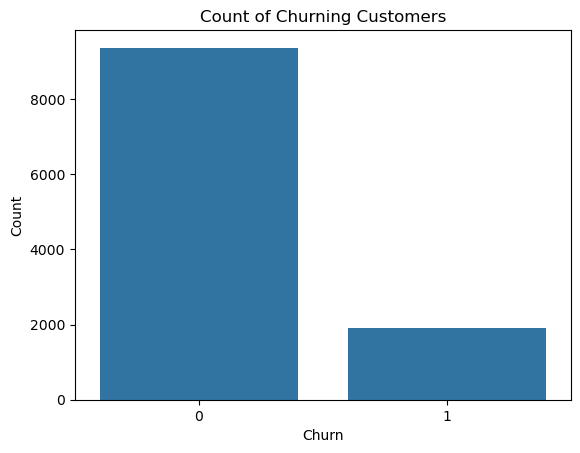

In [117]:
sns.countplot(x='Churn', data = d_temp)
plt.title("Count of Churning Customers")
plt.ylabel("Count");

In [118]:
d_temp['Churn'].unique()

array([1, 0], dtype=int64)

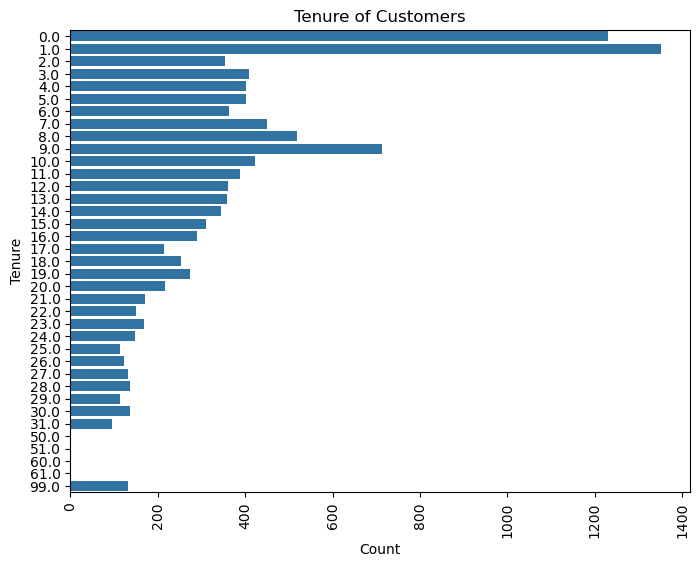

In [119]:
fig = plt.figure(figsize=(8,6))
sns.countplot(y = 'Tenure', data=d_temp)
plt.title("Tenure of Customers")
plt.xlabel("Count")
plt.xticks(rotation=90);

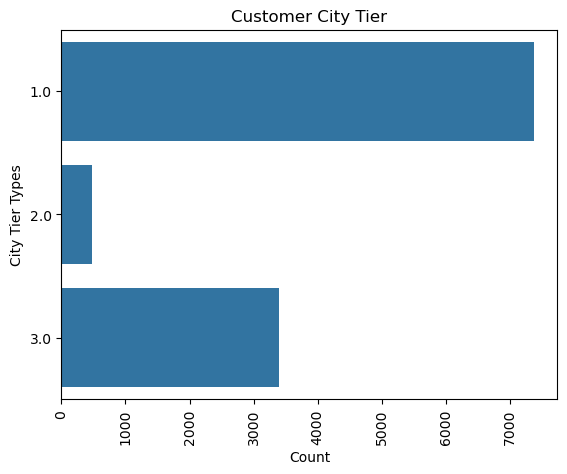

In [120]:
sns.countplot(y = 'City_tier', data=d_temp)
plt.title("Customer City Tier")
plt.ylabel("City Tier Types")
plt.xlabel("Count")
plt.xticks(rotation=90);

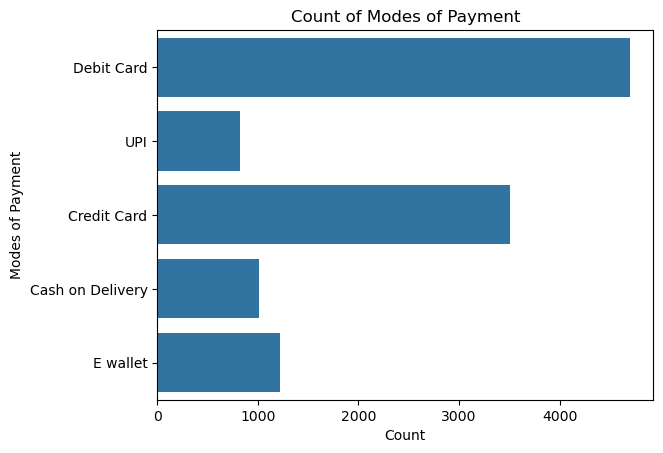

In [121]:
sns.countplot(y = 'Payment_mode', data = d_temp)
plt.title("Count of Modes of Payment")
plt.ylabel("Modes of Payment")
plt.xlabel("Count");

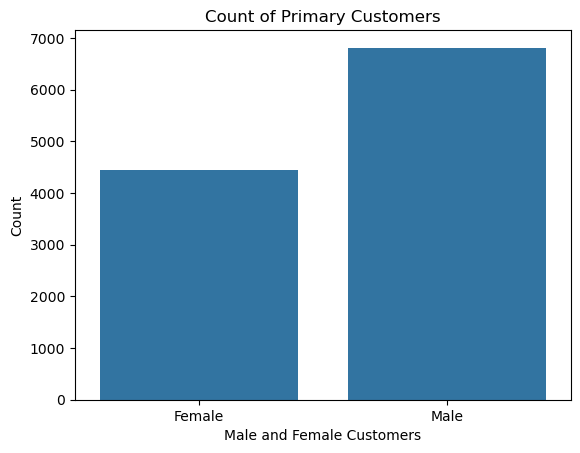

In [122]:
sns.countplot(x = 'Gender', data = d_temp)
plt.title("Count of Primary Customers")
plt.ylabel("Count")
plt.xlabel("Male and Female Customers");

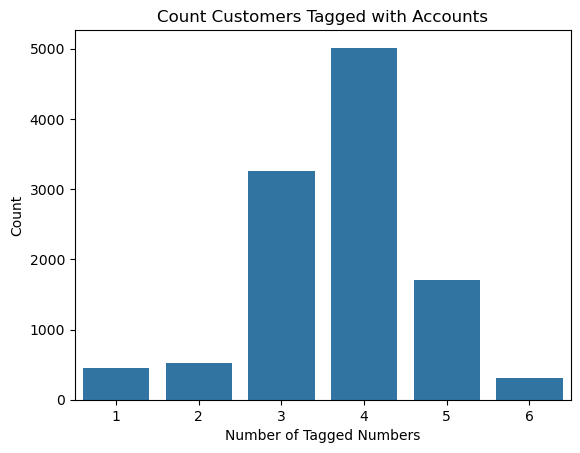

In [123]:
sns.countplot(x = 'Account_user_count', data = d_temp)
plt.title("Count Customers Tagged with Accounts")
plt.ylabel("Count")
plt.xlabel("Number of Tagged Numbers");

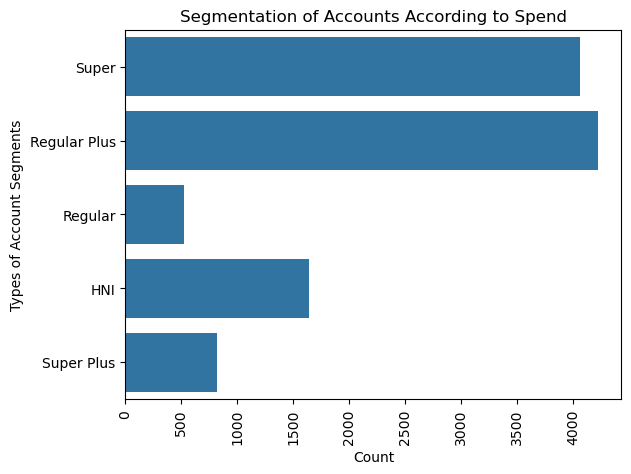

In [124]:
sns.countplot(y = 'Account_segment', data = d_temp)
plt.xticks(rotation=90)
plt.title("Segmentation of Accounts According to Spend")
plt.xlabel("Count")
plt.ylabel("Types of Account Segments");

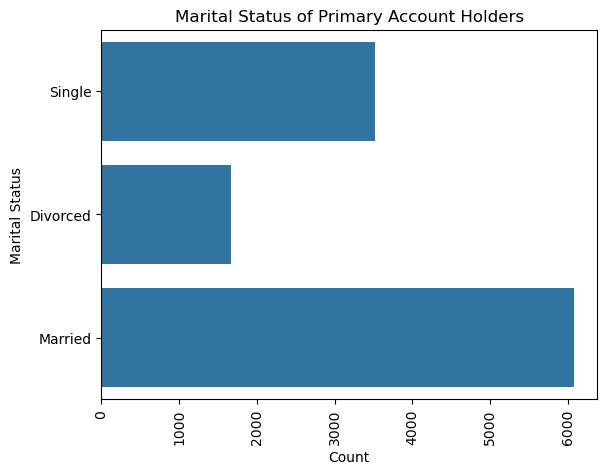

In [125]:
sns.countplot(y = 'Marital_Status', data = d_temp)
plt.xticks(rotation=90)
plt.title("Marital Status of Primary Account Holders")
plt.xlabel("Count")
plt.ylabel("Marital Status");

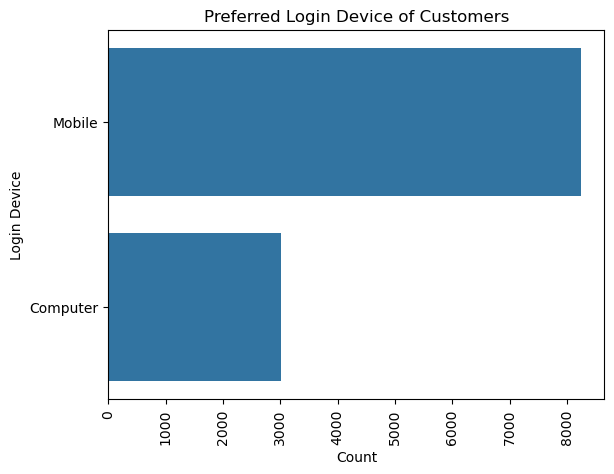

In [126]:
sns.countplot(y = 'Login_device', data = d_temp)
plt.xticks(rotation=90)
plt.title("Preferred Login Device of Customers")
plt.xlabel("Count")
plt.ylabel("Login Device");

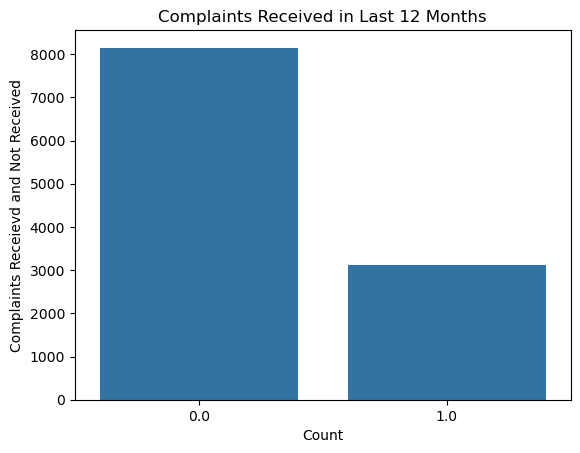

In [127]:
sns.countplot(x = 'Complain_ly', data=d_temp)
plt.title("Complaints Received in Last 12 Months")
plt.xlabel("Count")
plt.ylabel("Complaints Receievd and Not Received");

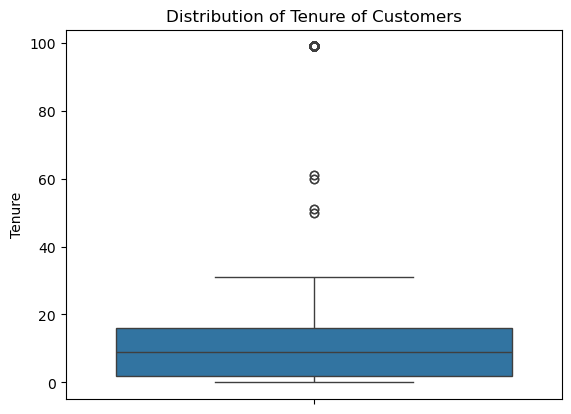

In [128]:
sns.boxplot(y="Tenure", data=d_temp)
plt.title("Distribution of Tenure of Customers"); 

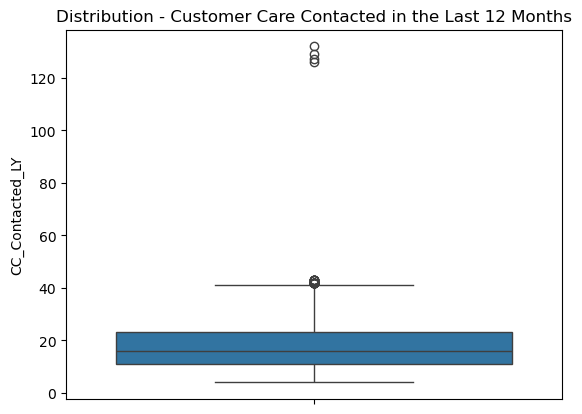

In [129]:
sns.boxplot(y="CC_Contacted_LY", data=d_temp)
plt.title("Distribution - Customer Care Contacted in the Last 12 Months"); 

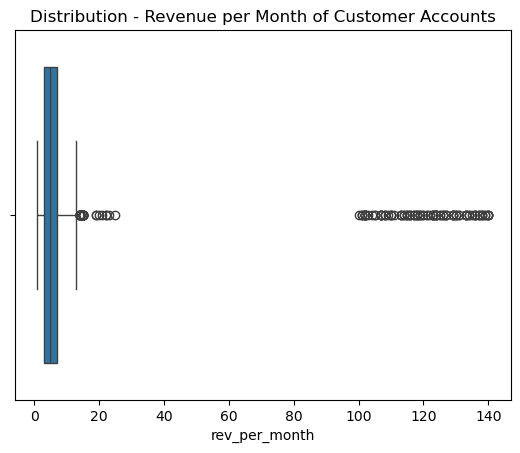

In [130]:
sns.boxplot(x="rev_per_month", data=d_temp)
plt.title("Distribution - Revenue per Month of Customer Accounts"); 

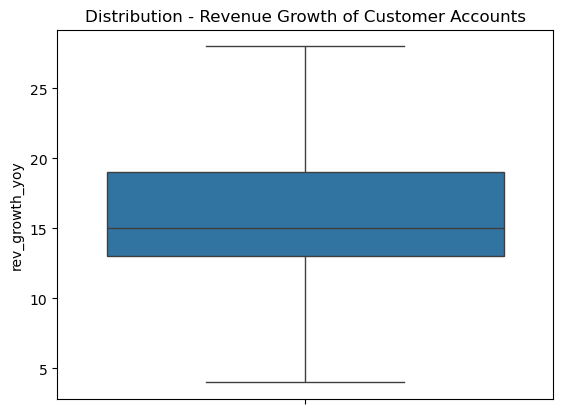

In [131]:
sns.boxplot(y="rev_growth_yoy", data=d_temp)
plt.title("Distribution - Revenue Growth of Customer Accounts"); 

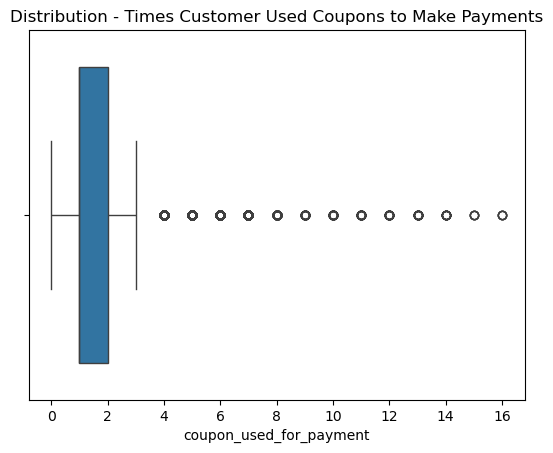

In [132]:
sns.boxplot(x="coupon_used_for_payment", data=d_temp)
plt.title("Distribution - Times Customer Used Coupons to Make Payments"); 

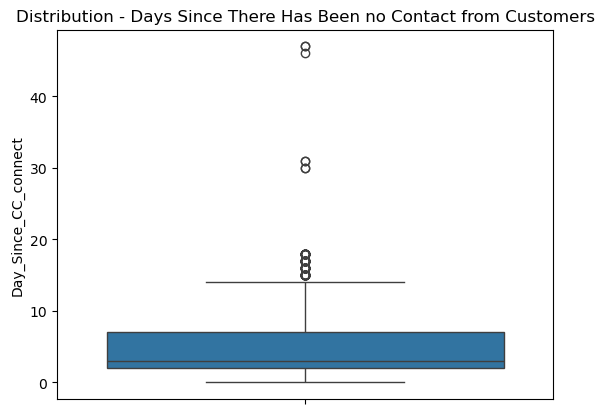

In [133]:
sns.boxplot(y="Day_Since_CC_connect", data=d_temp)
plt.title("Distribution - Days Since There Has Been no Contact from Customers"); 

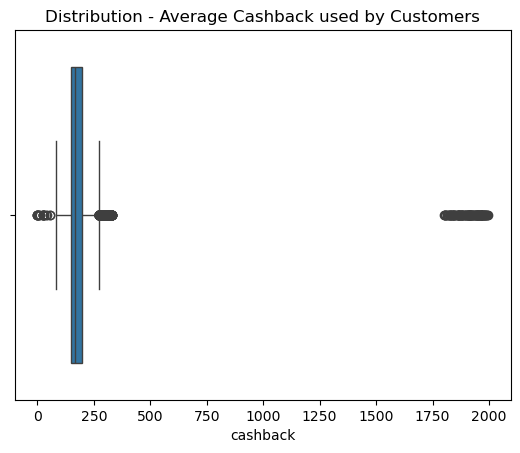

In [134]:
sns.boxplot(x="cashback", data=d_temp)
plt.title("Distribution - Average Cashback used by Customers"); 

## Bivariate Analysis

Text(0.5, 1.0, 'Tenure for Customers - Loyal and Risky')

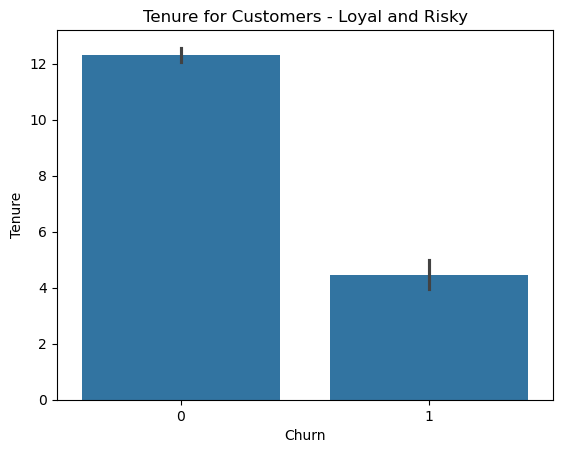

In [136]:
sns.barplot(x="Churn", y = "Tenure", data=d_temp)
plt.title("Tenure for Customers - Loyal and Risky")

Text(0, 0.5, 'Number of Times Contacted')

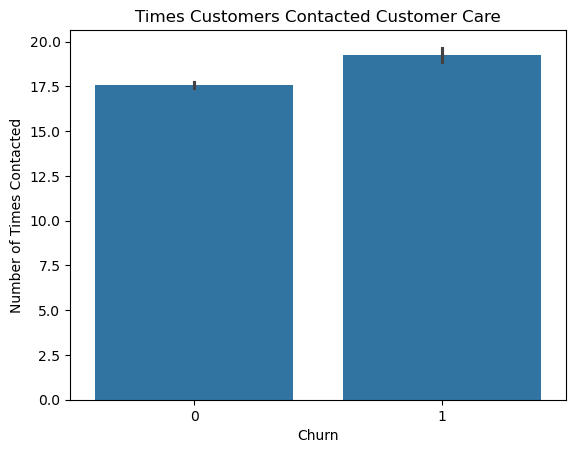

In [137]:
sns.barplot(x="Churn", y = "CC_Contacted_LY", data=d_temp)
plt.title("Times Customers Contacted Customer Care")
plt.ylabel("Number of Times Contacted")

Text(0, 0.5, 'Revenue')

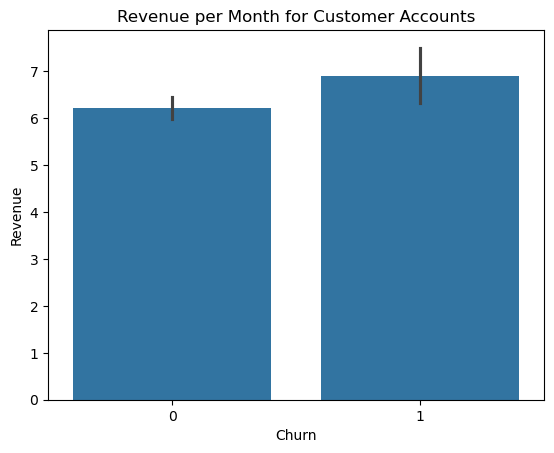

In [138]:
sns.barplot(x="Churn", y = "rev_per_month", data=d_temp)
plt.title("Revenue per Month for Customer Accounts")
plt.ylabel("Revenue")

<Axes: xlabel='Churn', ylabel='rev_growth_yoy'>

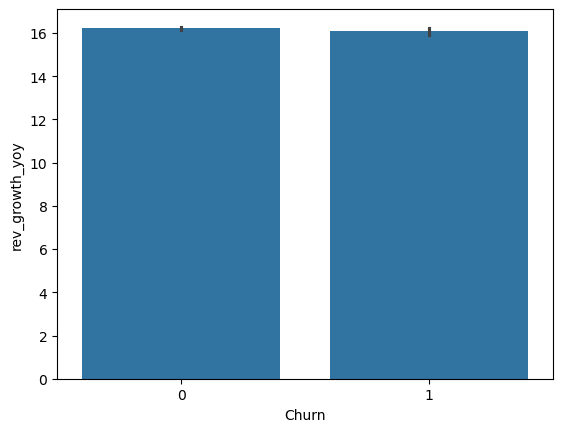

In [139]:
sns.barplot(x="Churn", y = "rev_growth_yoy", data=d_temp)

<Axes: xlabel='Churn', ylabel='coupon_used_for_payment'>

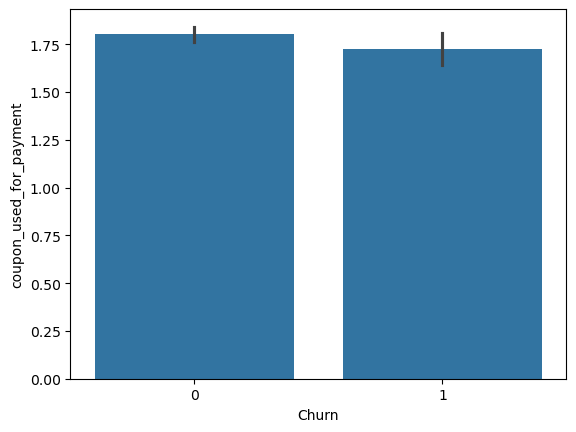

In [140]:
sns.barplot(x="Churn", y = "coupon_used_for_payment", data=d_temp)

Text(0, 0.5, 'Number of Days')

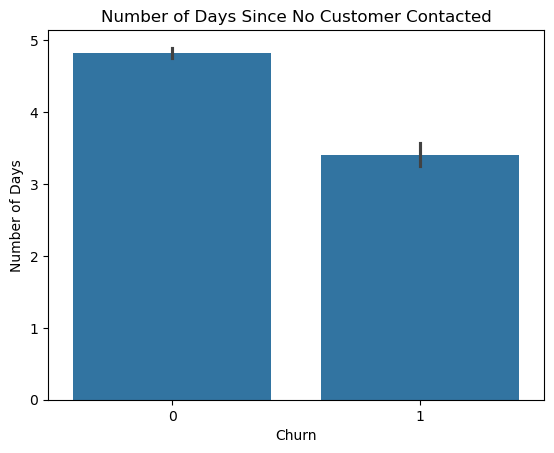

In [141]:
sns.barplot(x="Churn", y = "Day_Since_CC_connect", data=d_temp)
plt.title("Number of Days Since No Customer Contacted")
plt.ylabel("Number of Days")

Text(0, 0.5, 'Average Cashback in Last 12 Months')

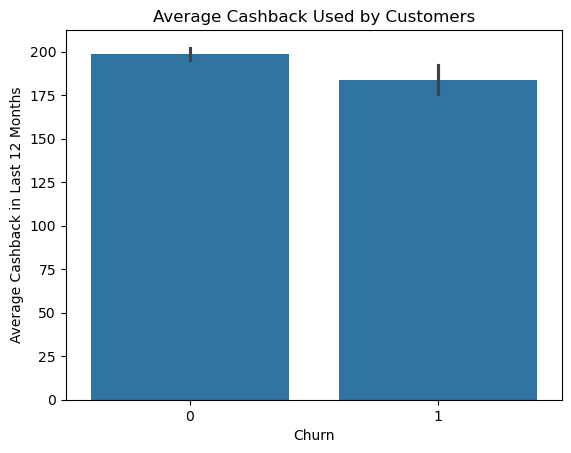

In [142]:
sns.barplot(x="Churn", y = "cashback", data=d_temp)
plt.title("Average Cashback Used by Customers")
plt.ylabel("Average Cashback in Last 12 Months")


In [143]:
crosstab_result = pd.crosstab(
    index=[d_temp['Gender'], d_temp['Marital_Status'], d_temp['Login_device'], d_temp['Payment_mode']],
    columns='Total',
    values=d_temp['rev_per_month'],
    aggfunc='sum'  # You can change this to 'mean', 'count', etc.
)

print(crosstab_result)

col_0                                                Total
Gender Marital_Status Login_device Payment_mode           
Female Divorced       Computer     Cash on Delivery     44
                                   Credit Card         533
                                   Debit Card          336
                                   E wallet            353
                                   UPI                 147
                      Mobile       Cash on Delivery    408
                                   Credit Card        1103
                                   Debit Card         1524
                                   E wallet            334
                                   UPI                 381
       Married        Computer     Cash on Delivery    130
                                   Credit Card        1053
                                   Debit Card         1347
                                   E wallet            368
                                   UPI                 3

### Dropping and Transforming Columns

In [145]:
df.drop('AccountID', axis=1, inplace=True)

In [146]:
df['Churn']= df['Churn'].astype('category')
df['City_tier'] = df['City_tier'].astype('category')
df['Payment_mode'] = df['Payment_mode'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Service_score'] = df['Service_score'].astype('category')
df['Account_user_count'] = df['Account_user_count'].astype('category')
df['Account_segment'] = df['Account_segment'].astype('category')
df['CC_Agent_Score'] = df['CC_Agent_Score'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Complain_ly'] = df['Complain_ly'].astype('category')


In [147]:
df['Tenure'] = df['Tenure'].astype('int64')
df['rev_per_month'] = df['rev_per_month'].astype('float64')
df['rev_growth_yoy'] = df['rev_growth_yoy'].astype('float64')
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].astype('int64')
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].astype('int64')
df['cashback'] = df['cashback'].astype('float64')

In [148]:
df1 = pd.DataFrame(df)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Churn                    11260 non-null  category
 1   Tenure                   11260 non-null  int64   
 2   City_tier                11260 non-null  category
 3   CC_Contacted_LY          11260 non-null  float64 
 4   Payment_mode             11260 non-null  category
 5   Gender                   11260 non-null  category
 6   Service_score            11260 non-null  category
 7   Account_user_count       11260 non-null  category
 8   Account_segment          11260 non-null  category
 9   CC_Agent_Score           11260 non-null  category
 10  Marital_Status           11260 non-null  category
 11  rev_per_month            11260 non-null  float64 
 12  Complain_ly              11260 non-null  category
 13  rev_growth_yoy           11260 non-null  float64 
 14  coupon

In [150]:
response = df['Churn']

In [151]:
predictors = df.drop('Churn', axis=1)

In [152]:
predictors.head()

,Tenure,City_tier,CC_Contacted_LY,Payment_mode,Gender,Service_score,Account_user_count,Account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9.0,1.0,11.0,1,5,159.93,Mobile
1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7.0,1.0,15.0,0,0,120.90,Mobile
2,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6.0,1.0,14.0,0,3,196.24,Mobile
3,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8.0,0.0,23.0,0,3,134.07,Mobile
4,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3.0,0.0,11.0,1,3,129.60,Mobile


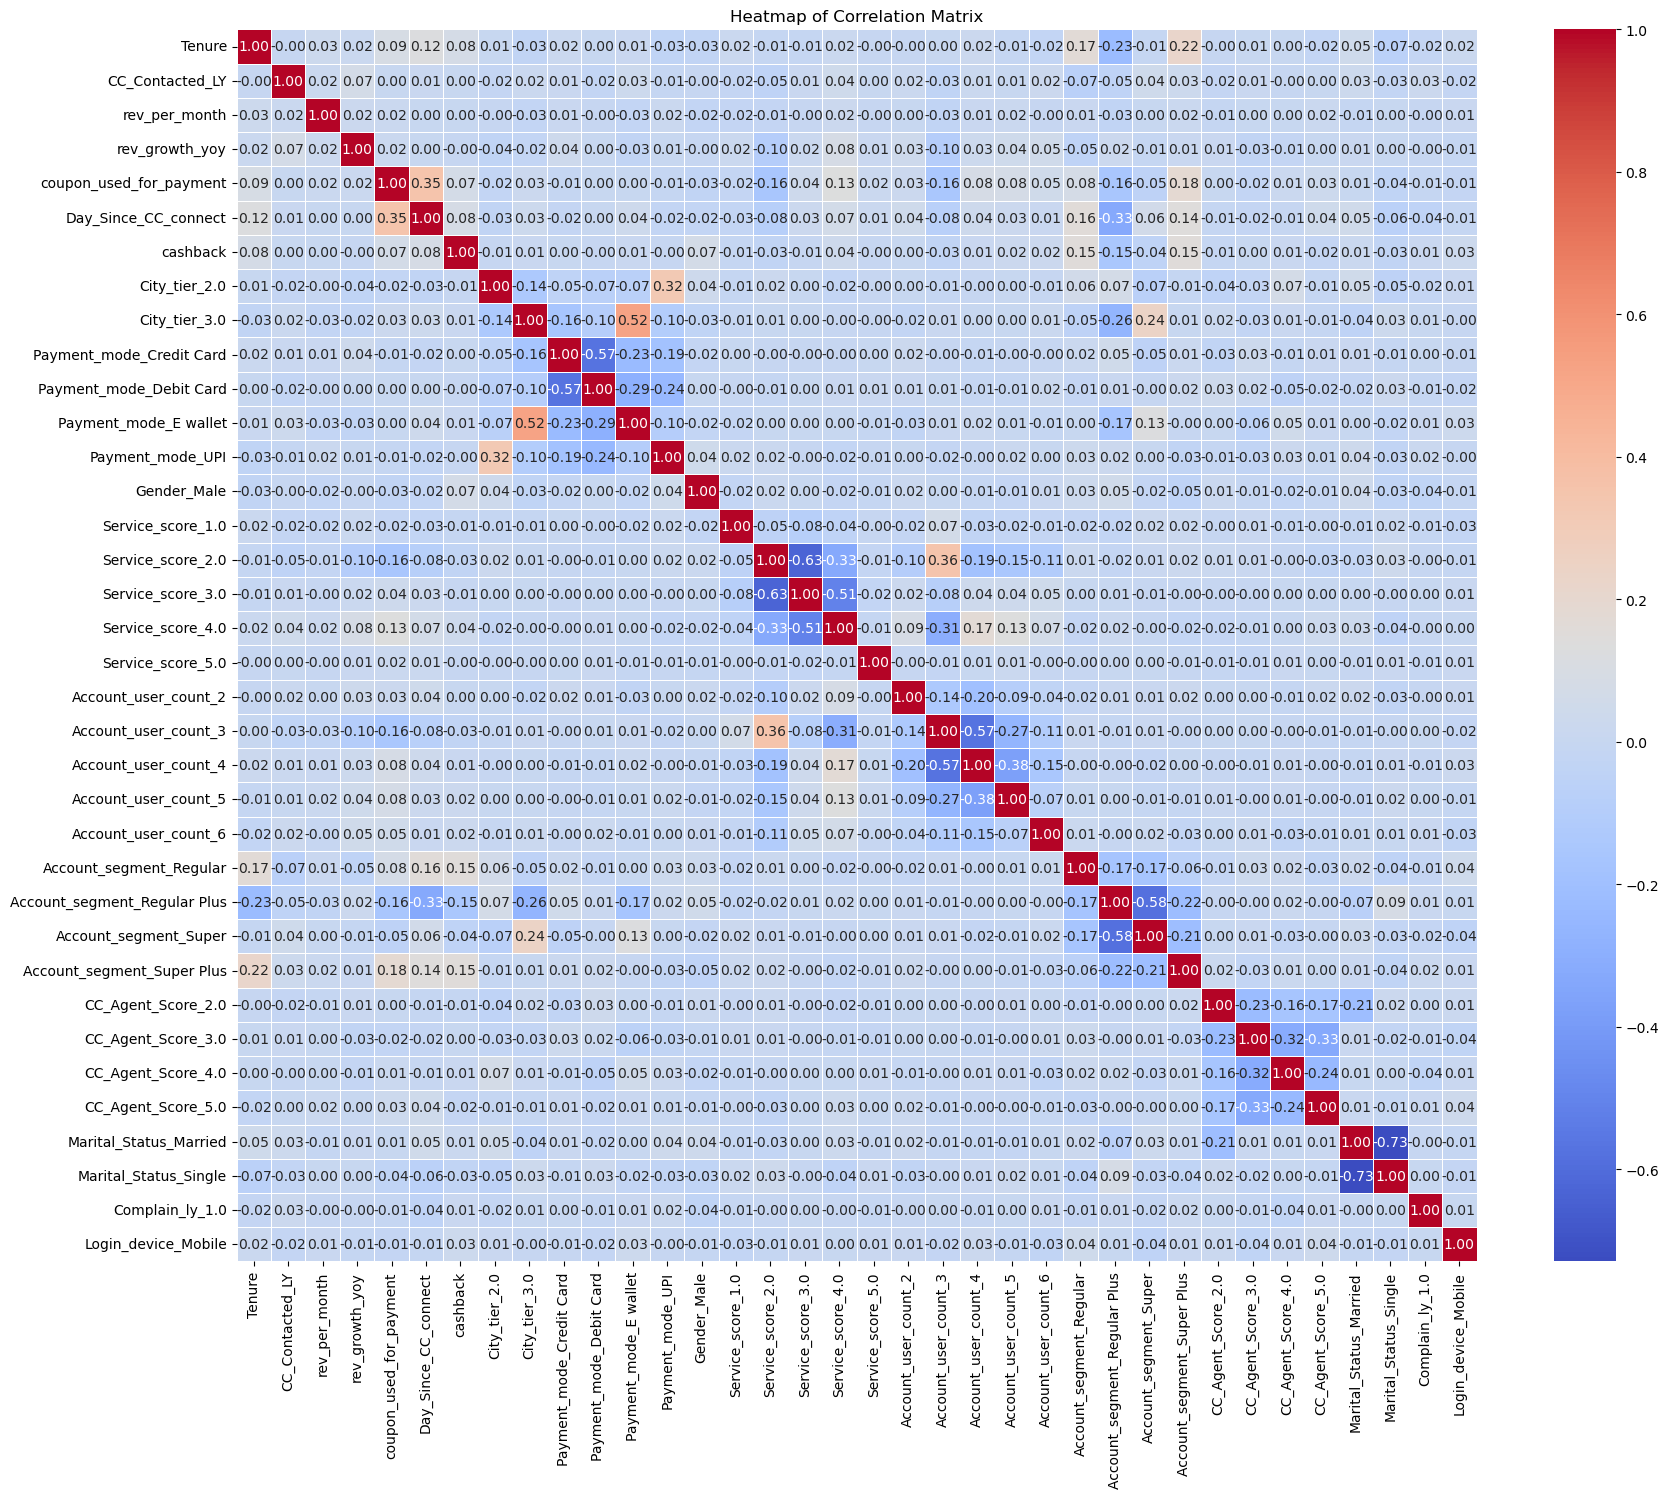

In [153]:
df_encoded = pd.get_dummies(predictors, drop_first=True)  # Avoids dummy variable trap
df_encoded = df_encoded.astype(int)  # Convert boolean columns to numeric (0 and 1)
# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()

## Multivariate Analysis

In [155]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [156]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

In [157]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

In [158]:
cat_cols

Index(['Churn', 'City_tier', 'Payment_mode', 'Gender', 'Service_score',
       'Account_user_count', 'Account_segment', 'CC_Agent_Score',
       'Marital_Status', 'Complain_ly', 'Login_device'],
      dtype='object')

In [159]:
label_encoders = {}
df_encoded = df.copy()
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store for future decoding

In [160]:
X = df_encoded[num_cols] + df_encoded[cat_cols]  # Full feature set
y = df_encoded[cat_cols[0]]          # Target variable (first categorical column)

In [161]:
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
X_selected = rfe_selector.fit_transform(X, y)

In [162]:
# Get selected feature names
selected_features = [col for col, keep in zip(X.columns, rfe_selector.support_) if keep]
print(f"Selected Features: {selected_features}")

Selected Features: ['Gender', 'Login_device', 'Marital_Status', 'Payment_mode', 'Service_score', 'Tenure', 'cashback', 'coupon_used_for_payment', 'rev_growth_yoy', 'rev_per_month']


In [163]:
# Prepare data with selected features
df_selected = df_encoded[selected_features]
df_selected.head()

,Gender,Login_device,Marital_Status,Payment_mode,Service_score,Tenure,cashback,coupon_used_for_payment,rev_growth_yoy,rev_per_month
0,0,1,2,2,3,4,159.93,1,11.0,9.0
1,1,1,2,4,3,0,120.90,0,15.0,7.0
2,1,1,2,2,2,0,196.24,0,14.0,6.0
3,1,1,2,2,2,0,134.07,0,23.0,8.0
4,1,1,2,1,2,0,129.60,1,11.0,3.0


In [164]:
X_selected_np = df_selected.values

In [165]:
cat_indices = [df_selected.columns.get_loc(col) for col in cat_cols if col in selected_features]

In [166]:
kproto = KPrototypes(n_clusters=3, init='Huang', n_jobs=-1, random_state=42)
clusters = kproto.fit_predict(X_selected_np, categorical=cat_indices)

In [167]:
sil_score = silhouette_score(df_selected, clusters)
print(f'Silhouette Score: {sil_score:.4f}')

Silhouette Score: 0.6217


In [168]:
df_selected['Cluster'] = clusters
df_selected['Target'] = df_encoded['Churn']

C:\Users\Bhamini\AppData\Local\Temp\ipykernel_16808\85143630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = clusters
C:\Users\Bhamini\AppData\Local\Temp\ipykernel_16808\85143630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Target'] = df_encoded['Churn']


In [169]:
df_selected.head()

,Gender,Login_device,Marital_Status,Payment_mode,Service_score,Tenure,cashback,coupon_used_for_payment,rev_growth_yoy,rev_per_month,Cluster,Target
0,0,1,2,2,3,4,159.93,1,11.0,9.0,2,1
1,1,1,2,4,3,0,120.90,0,15.0,7.0,2,1
2,1,1,2,2,2,0,196.24,0,14.0,6.0,2,1
3,1,1,2,2,2,0,134.07,0,23.0,8.0,2,1
4,1,1,2,1,2,0,129.60,1,11.0,3.0,2,1


In [170]:
df_selected.to_excel('Churn_MVA.xlsx')

## Decision Tree Classifier

In [172]:
d_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  float64
 3   City_tier                11260 non-null  float64
 4   CC_Contacted_LY          11260 non-null  float64
 5   Payment_mode             11260 non-null  object 
 6   Gender                   11260 non-null  object 
 7   Service_score            11260 non-null  float64
 8   Account_user_count       11260 non-null  int64  
 9   Account_segment          11260 non-null  object 
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  object 
 12  rev_per_month            11260 non-null  int64  
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

In [173]:
for feature in d_temp.columns: 
    if d_temp[feature].dtype == 'object': 
        d_temp[feature] = pd.Categorical(d_temp[feature]).codes

In [174]:
d_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  float64
 3   City_tier                11260 non-null  float64
 4   CC_Contacted_LY          11260 non-null  float64
 5   Payment_mode             11260 non-null  int8   
 6   Gender                   11260 non-null  int8   
 7   Service_score            11260 non-null  float64
 8   Account_user_count       11260 non-null  int64  
 9   Account_segment          11260 non-null  int8   
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  int8   
 12  rev_per_month            11260 non-null  int64  
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

In [175]:
X = d_temp.drop(["Churn", "AccountID"] , axis=1)

y = d_temp.pop("Churn")


In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


In [177]:
dt_model = DecisionTreeClassifier(random_state = 42 )

In [178]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=42)

In [181]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Churn_Tree_File = open('d:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Churn_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Churn_Tree_File.close()

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Bhamini\AppData\Local\Temp\ipykernel_16808\3443290230.py:4: SyntaxWarning: invalid escape sequence '\c'
  Churn_Tree_File = open('d:\credit_tree.dot','w')


In [182]:
ytrain_predict1 = dt_model.predict(X_train)
ytest_predict1 = dt_model.predict(X_test)

In [183]:
from sklearn.metrics import classification_report

In [184]:
print(classification_report(train_labels, ytrain_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [185]:
print(classification_report(test_labels, ytest_predict1))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2808
           1       0.84      0.82      0.83       570

    accuracy                           0.94      3378
   macro avg       0.90      0.89      0.90      3378
weighted avg       0.94      0.94      0.94      3378



In [186]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                              Imp
Tenure                   0.300339
City_tier                0.033965
CC_Contacted_LY          0.043120
Payment_mode             0.056368
Gender                   0.026431
Service_score            0.017904
Account_user_count       0.031576
Account_segment          0.029473
CC_Agent_Score           0.062246
Marital_Status           0.029987
rev_per_month            0.039641
Complain_ly              0.059707
rev_growth_yoy           0.069423
coupon_used_for_payment  0.013416
Day_Since_CC_connect     0.085570
cashback                 0.080881
Login_device             0.019952


In [187]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [188]:
from skopt import BayesSearchCV

In [189]:
param_grid = {
    "max_depth": (2, 20),
    "min_samples_split": (2, 20),
    "min_samples_leaf": (1, 20)
}

In [190]:
opt_model = BayesSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),  # Must use keyword here
    search_spaces=param_grid,  # `search_spaces` must be named
    n_iter=30,  # Number of iterations
    cv=5,  # Cross-validation folds
    scoring='accuracy',
    random_state=42
)


In [191]:
opt_model.fit(X_train, train_labels)
best_model = opt_model.best_estimator_
print("Best Parameters:", opt_model.best_params_)

Best Parameters: OrderedDict({'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2})


In [192]:
from sklearn.metrics import roc_curve, accuracy_score

In [193]:
y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probability estimates
fpr, tpr, thresholds = roc_curve(test_labels, y_probs)

In [194]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.2


In [195]:
y_pred = (y_probs >= optimal_threshold).astype(int)
final_accuracy = accuracy_score(test_labels, y_pred)
print("Final Model Accuracy:", final_accuracy)

Final Model Accuracy: 0.9399052693901717


In [196]:
best_model = opt_model.best_estimator_

In [197]:
from sklearn.tree import export_graphviz

In [198]:
export_graphviz(best_model, out_file="decision_tree.dot", 
                feature_names=[f"Feature {i}" for i in range(X_train.shape[1])],
                class_names=["Class 0", "Class 1"], filled=True, rounded=True)

print("DOT file created successfully!")

DOT file created successfully!


In [199]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

AUC: 1.000


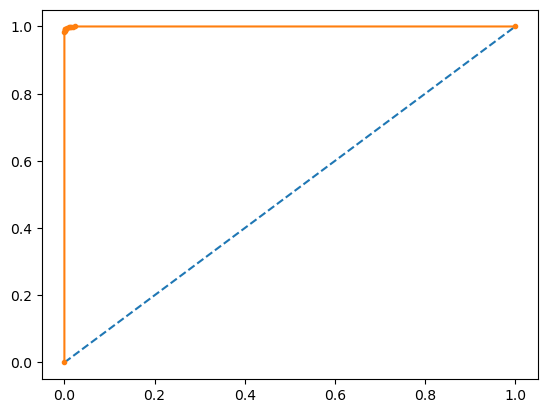

In [200]:
# AUC and ROC for the training data

# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.893


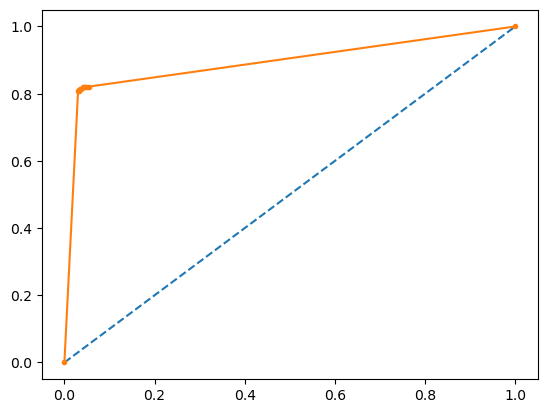

In [201]:
# AUC and ROC for the test data


# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [202]:
from sklearn.metrics import classification_report,confusion_matrix

In [203]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      0.98      0.99      1326

    accuracy                           1.00      7882
   macro avg       1.00      0.99      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [204]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2808
           1       0.84      0.81      0.83       570

    accuracy                           0.94      3378
   macro avg       0.90      0.89      0.90      3378
weighted avg       0.94      0.94      0.94      3378



In [205]:
best_model.score(X_train,train_labels)

0.9973357015985791

In [206]:
best_model.score(X_test,test_labels)

0.9422735346358793

## Random Tree Classifier

In [208]:
 from sklearn.ensemble import RandomForestClassifier

In [209]:
radm_clf = RandomForestClassifier(max_depth = 10, n_estimators=10, random_state=43)
radm_clf.fit(X_train, train_labels)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=43)

In [210]:
print (pd.DataFrame(radm_clf.feature_importances_, columns = ["Imp"], index = X_train.columns))

                              Imp
Tenure                   0.327957
City_tier                0.022199
CC_Contacted_LY          0.053294
Payment_mode             0.040769
Gender                   0.015153
Service_score            0.014722
Account_user_count       0.029098
Account_segment          0.030282
CC_Agent_Score           0.060018
Marital_Status           0.040940
rev_per_month            0.046072
Complain_ly              0.089176
rev_growth_yoy           0.043374
coupon_used_for_payment  0.028439
Day_Since_CC_connect     0.062885
cashback                 0.078229
Login_device             0.017393


AUC: 0.991


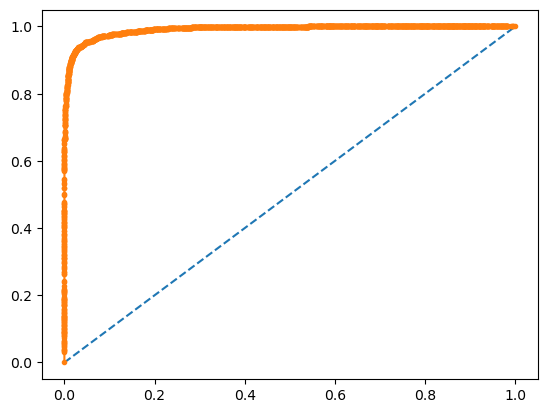

In [211]:
# AUC and ROC for the training data

# predict probabilities
probs = radm_clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.964


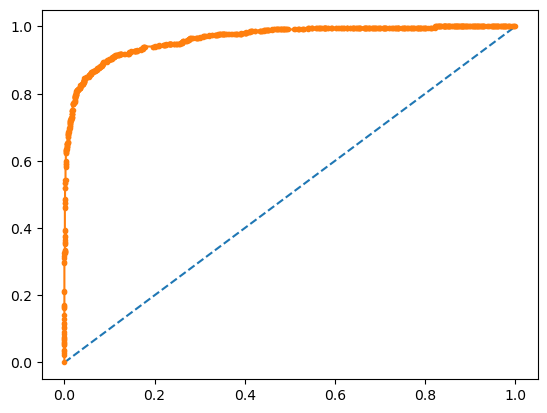

In [212]:
# AUC and ROC for the test data


# predict probabilities
probs = radm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [213]:
ytrain_predict = radm_clf.predict(X_train)
ytest_predict = radm_clf.predict(X_test)

In [214]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6556
           1       0.98      0.79      0.87      1326

    accuracy                           0.96      7882
   macro avg       0.97      0.89      0.93      7882
weighted avg       0.96      0.96      0.96      7882



In [215]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2808
           1       0.94      0.68      0.79       570

    accuracy                           0.94      3378
   macro avg       0.94      0.84      0.88      3378
weighted avg       0.94      0.94      0.94      3378



In [216]:
param_spaces = {
        "n_estimators": (50, 500),
        "max_depth": (3, 20),
        "min_samples_split": (2, 20),
        "min_samples_leaf": (1, 20)
}


In [217]:
opt_model = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=43),  # Must use keyword here
    search_spaces=param_spaces,  # `search_spaces` must be named
    n_iter=30,  # Number of iterations
    cv=5,  # Cross-validation folds
    scoring='accuracy',
    random_state=43
)


In [218]:
opt_model.fit(X_train, train_labels)
best_model = opt_model.best_estimator_
print("Best Parameters:", opt_model.best_params_)

Best Parameters: OrderedDict({'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500})


In [219]:
y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probability estimates
fpr, tpr, thresholds = roc_curve(test_labels, y_probs)

In [220]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.29845714285714287


In [221]:
y_pred = (y_probs >= optimal_threshold).astype(int)
final_accuracy = accuracy_score(test_labels, y_pred)
print("Final Model Accuracy:", final_accuracy)

Final Model Accuracy: 0.9712847838957963


In [222]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

AUC: 1.000


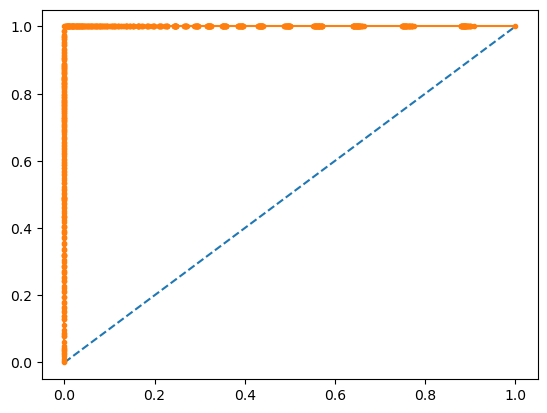

In [223]:
# AUC and ROC for the training data

# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.993


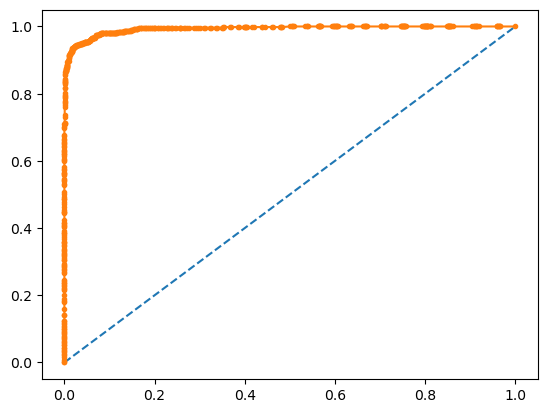

In [224]:
# AUC and ROC for the test data


# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [225]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [226]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2808
           1       0.99      0.86      0.92       570

    accuracy                           0.98      3378
   macro avg       0.98      0.93      0.95      3378
weighted avg       0.98      0.98      0.97      3378



## AdaBoost

In [228]:
from sklearn.ensemble import AdaBoostClassifier

In [229]:
from sklearn.linear_model import LogisticRegression
logreg_clf = LogisticRegression()

In [230]:
ada_clf = AdaBoostClassifier(logreg_clf, n_estimators=50, random_state=44)
ada_clf.fit(X_train, train_labels)

C:\Users\Bhamini\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Bhamini\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bhamini\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or 

AdaBoostClassifier(estimator=LogisticRegression(), random_state=44)

AUC: 0.817


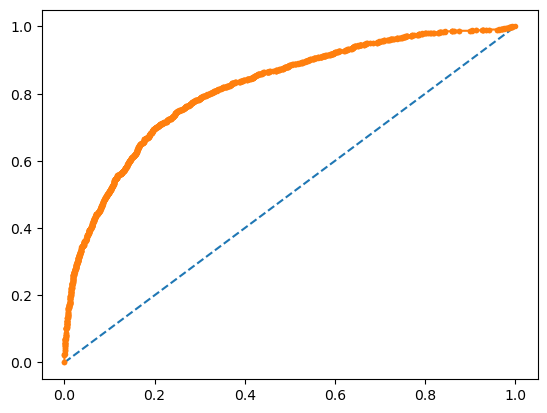

In [231]:
# AUC and ROC for the training data

# predict probabilities
probs = ada_clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.820


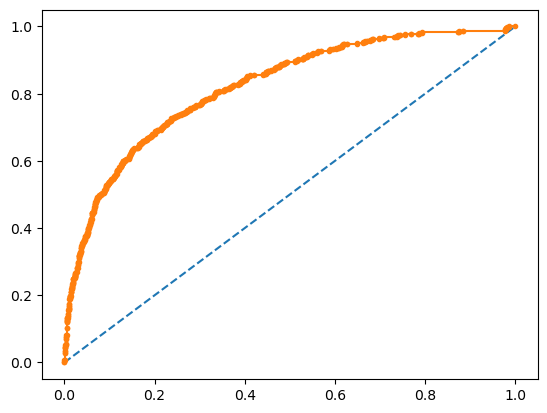

In [232]:
# AUC and ROC for the test data


# predict probabilities
probs = ada_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [233]:
ytrain_predict = ada_clf.predict(X_train)
ytest_predict = ada_clf.predict(X_test)

In [234]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6556
           1       0.74      0.22      0.34      1326

    accuracy                           0.86      7882
   macro avg       0.80      0.60      0.63      7882
weighted avg       0.84      0.86      0.82      7882



In [235]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2808
           1       0.72      0.25      0.37       570

    accuracy                           0.86      3378
   macro avg       0.79      0.61      0.64      3378
weighted avg       0.84      0.86      0.83      3378



In [236]:
params1 = {
        "n_estimators": (50, 500),
        "learning_rate": (0.01, 1.0)
}


In [237]:
opt_model = BayesSearchCV(
    estimator=AdaBoostClassifier(random_state=44),  # Must use keyword here
    search_spaces=params1,  # `search_spaces` must be named
    n_iter=30,  # Number of iterations
    cv=5,  # Cross-validation folds
    scoring='accuracy',
    random_state=44
)

In [238]:
opt_model.fit(X_train, train_labels)
best_model = opt_model.best_estimator_
print("Best Parameters:", opt_model.best_params_)

C:\Users\Bhamini\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Bhamini\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Bhamini\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Bhamini\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\U

Best Parameters: OrderedDict({'learning_rate': 0.5196466947485585, 'n_estimators': 500})


In [239]:
y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probability estimates
fpr, tpr, thresholds = roc_curve(test_labels, y_probs)

In [240]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.49817691232084693


In [241]:
y_pred = (y_probs >= optimal_threshold).astype(int)
final_accuracy = accuracy_score(test_labels, y_pred)
print("Final Model Accuracy:", final_accuracy)

Final Model Accuracy: 0.8173475429248076


In [242]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [243]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6556
           1       0.77      0.60      0.68      1326

    accuracy                           0.90      7882
   macro avg       0.85      0.78      0.81      7882
weighted avg       0.90      0.90      0.90      7882



In [244]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2808
           1       0.75      0.58      0.65       570

    accuracy                           0.90      3378
   macro avg       0.83      0.77      0.80      3378
weighted avg       0.89      0.90      0.89      3378



## Naive Bayes

In [246]:
from sklearn.naive_bayes import GaussianNB

In [247]:
NB_model = GaussianNB()
NB_model.fit(X_train, train_labels)

GaussianNB()

AUC: 0.817


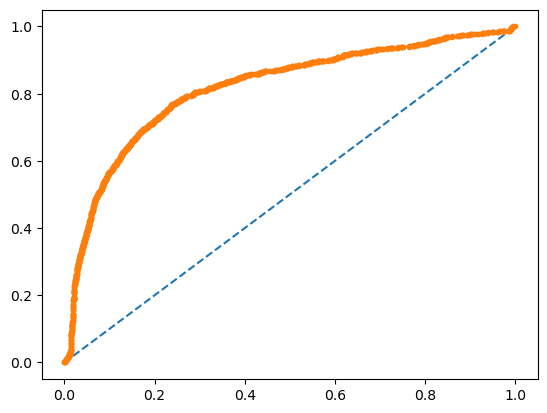

In [248]:
# AUC and ROC for the training data

# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.809


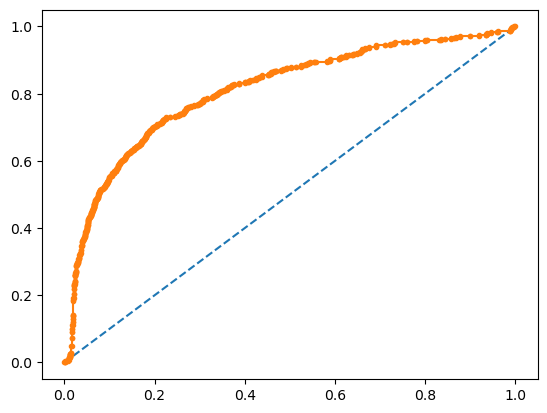

In [249]:
# AUC and ROC for the test data


# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [250]:
ytrain_predict = NB_model.predict(X_train)
ytest_predict = NB_model.predict(X_test)

In [251]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6556
           1       0.66      0.26      0.38      1326

    accuracy                           0.85      7882
   macro avg       0.76      0.62      0.65      7882
weighted avg       0.83      0.85      0.83      7882



In [252]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2808
           1       0.69      0.28      0.40       570

    accuracy                           0.86      3378
   macro avg       0.78      0.63      0.66      3378
weighted avg       0.84      0.86      0.83      3378



In [253]:
params2 = {
        "var_smoothing": (1e-9, 1e-3)
}


In [254]:
opt_model = BayesSearchCV(
    estimator=GaussianNB(),  # Must use keyword here
    search_spaces=params2,  # `search_spaces` must be named
    n_iter=30,  # Number of iterations
    cv=5,  # Cross-validation folds
    scoring='accuracy',
)


In [255]:
opt_model.fit(X_train, train_labels)
best_model = opt_model.best_estimator_
print("Best Parameters:", opt_model.best_params_)

Best Parameters: OrderedDict({'var_smoothing': 3.904732028487995e-08})


In [256]:
y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probability estimates
fpr, tpr, thresholds = roc_curve(test_labels, y_probs)

In [257]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)


Optimal Threshold: 0.16338065366030707


In [258]:
y_pred = (y_probs >= optimal_threshold).astype(int)
final_accuracy = accuracy_score(test_labels, y_pred)
print("Final Model Accuracy:", final_accuracy)

Final Model Accuracy: 0.7673179396092362


In [259]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

AUC: 0.817


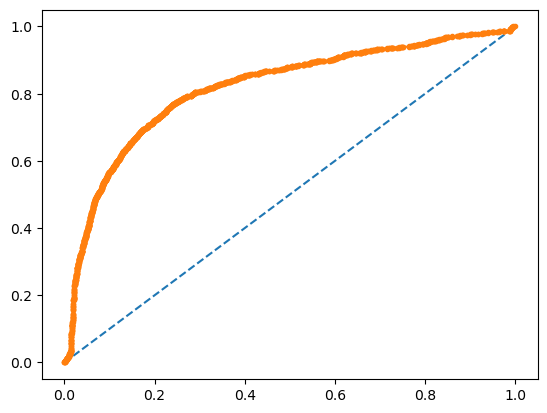

In [260]:
# AUC and ROC for the training data

# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.809


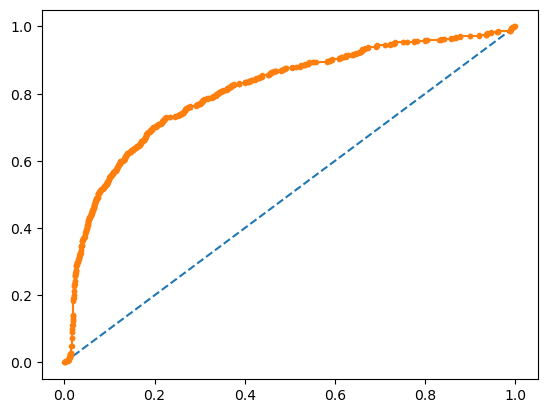

In [261]:
# AUC and ROC for the test data


# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [262]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6556
           1       0.66      0.26      0.38      1326

    accuracy                           0.85      7882
   macro avg       0.77      0.62      0.65      7882
weighted avg       0.83      0.85      0.83      7882



In [263]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2808
           1       0.69      0.28      0.40       570

    accuracy                           0.86      3378
   macro avg       0.78      0.63      0.66      3378
weighted avg       0.84      0.86      0.83      3378



## XG Boost Classifier

In [265]:
pip install xgboost

In [266]:
from xgboost import XGBClassifier

In [267]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', objective='binary:logistic')
xgb_model.fit(X_train, train_labels)

C:\Users\Bhamini\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:54:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [268]:
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC
xgb_preds = xgb_model.predict(X_test)  # Class predictions

In [269]:
from sklearn.metrics import roc_auc_score, classification_report

In [270]:
print("XGBoost ROC AUC Score:", roc_auc_score(test_labels, xgb_probs))
print("XGBoost Classification Report:\n", classification_report(test_labels, xgb_preds))

XGBoost ROC AUC Score: 0.9914373719198282
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2808
           1       0.96      0.86      0.91       570

    accuracy                           0.97      3378
   macro avg       0.97      0.92      0.94      3378
weighted avg       0.97      0.97      0.97      3378



In [271]:
xgb_fpr, xgb_tpr, _ = roc_curve(test_labels, xgb_probs)
xgb_auc = roc_auc_score(test_labels, xgb_probs)

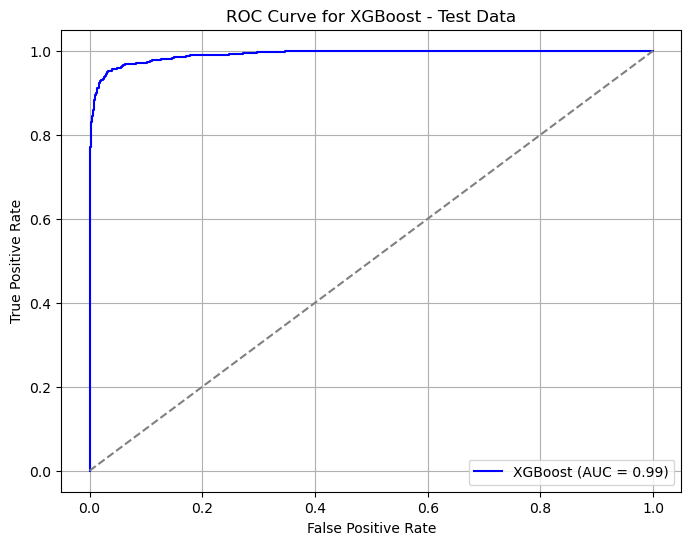

In [272]:
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost - Test Data')
plt.legend()
plt.grid()

In [273]:
xgb_probs1 = xgb_model.predict_proba(X_train)[:, 1]  # Probabilities for ROC AUC
xgb_preds1 = xgb_model.predict(X_train)  # Class predictions

In [274]:
xgb_fpr, xgb_tpr, _ = roc_curve(train_labels, xgb_probs1)
xgb_auc = roc_auc_score(train_labels, xgb_probs1)

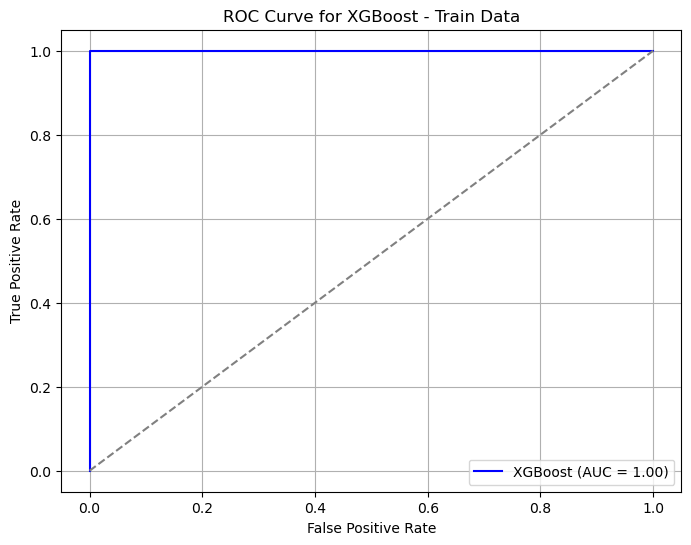

In [275]:
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost - Train Data')
plt.legend()
plt.grid()

In [276]:
print("XGBoost ROC AUC Score:", roc_auc_score(train_labels, xgb_probs1))
print("XGBoost Classification Report:\n", classification_report(train_labels, xgb_preds1))

XGBoost ROC AUC Score: 0.9999998849683018
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [280]:
params3 = {
        "n_estimators": (50, 500),
        "max_depth": (3, 20),
        "learning_rate": (0.01, 1.0, 'log-uniform'),
        "subsample": (0.5, 1.0)
}

In [282]:
opt_model = BayesSearchCV(
        estimator=XGBClassifier(),
        search_spaces=params3,
        n_iter=30,  # Number of iterations
        cv=5,  # Cross-validation folds
        scoring='accuracy',
        n_jobs=-1  # Use all CPU cores
)


In [284]:
opt_model.fit(X_train, train_labels)
best_model = opt_model.best_estimator_
print("Best Parameters:", opt_model.best_params_)

Best Parameters: OrderedDict({'learning_rate': 0.027160080835417048, 'max_depth': 20, 'n_estimators': 466, 'subsample': 0.9155590687758142})


In [286]:
y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probability estimates
fpr, tpr, thresholds = roc_curve(test_labels, y_probs)

In [288]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.19502059


In [290]:
y_pred = (y_probs >= optimal_threshold).astype(int)
final_accuracy = accuracy_score(test_labels, y_pred)
print("Final Model Accuracy:", final_accuracy)

Final Model Accuracy: 0.9760213143872114


In [292]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

AUC: 1.000


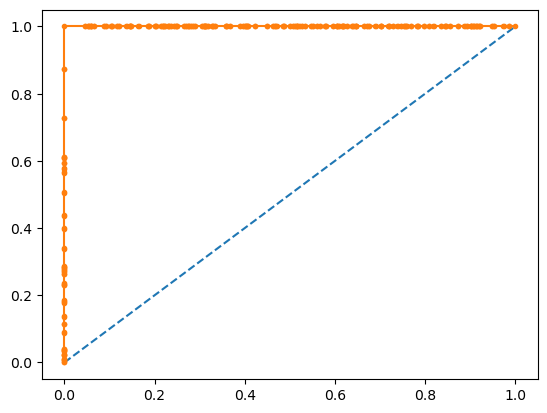

In [294]:
# AUC and ROC for the training data

# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.993


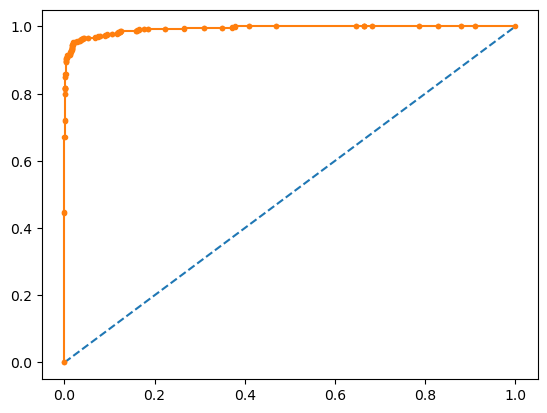

In [296]:
# AUC and ROC for the test data


# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [298]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [300]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2808
           1       0.98      0.90      0.94       570

    accuracy                           0.98      3378
   macro avg       0.98      0.95      0.96      3378
weighted avg       0.98      0.98      0.98      3378



## Support Vector Machine

In [302]:
from sklearn.svm import SVC

In [304]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [306]:
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, train_labels)

SVC(probability=True)

In [307]:
# predict probalilities for ROC curve
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]
svm_fpr, svm_tpr, _ = roc_curve(test_labels, svm_probs)
svm_auc = roc_auc_score(test_labels, svm_probs)

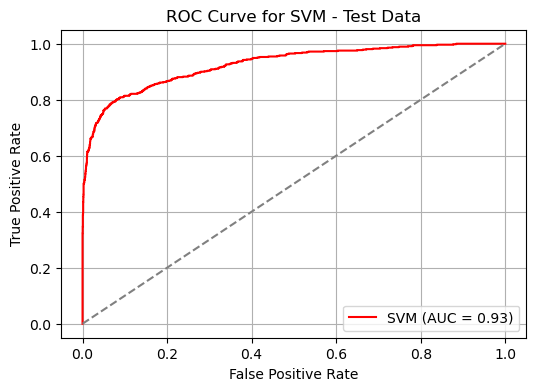

In [308]:
plt.figure(figsize=(6, 4))
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random model)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM - Test Data')
plt.legend()
plt.grid()

In [312]:
# predict probalilities for ROC curve
svm_probs = svm_model.predict_proba(X_train_scaled)[:, 1]
svm_fpr, svm_tpr, _ = roc_curve(train_labels, svm_probs)
svm_auc = roc_auc_score(train_labels, svm_probs)

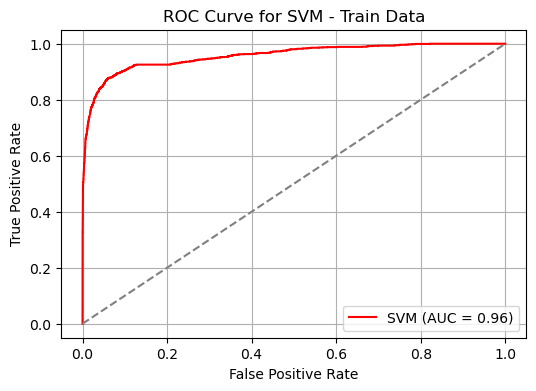

In [314]:
plt.figure(figsize=(6, 4))
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random model)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM - Train Data')
plt.legend()
plt.grid()

In [316]:
print("SVM Classification Report:\n", classification_report(test_labels, svm_model.predict(X_test_scaled)))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      2808
           1       0.92      0.59      0.72       570

    accuracy                           0.92      3378
   macro avg       0.92      0.79      0.84      3378
weighted avg       0.92      0.92      0.91      3378



In [318]:
print("SVM Classification Report:\n", classification_report(train_labels, svm_model.predict(X_train_scaled)))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      6556
           1       0.95      0.66      0.78      1326

    accuracy                           0.94      7882
   macro avg       0.94      0.83      0.87      7882
weighted avg       0.94      0.94      0.93      7882



# Building Models on Balanced Dataset

## Decision Tree Classifier

In [407]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Churn                    11260 non-null  category
 1   Tenure                   11260 non-null  int64   
 2   City_tier                11260 non-null  category
 3   CC_Contacted_LY          11260 non-null  float64 
 4   Payment_mode             11260 non-null  category
 5   Gender                   11260 non-null  category
 6   Service_score            11260 non-null  category
 7   Account_user_count       11260 non-null  category
 8   Account_segment          11260 non-null  category
 9   CC_Agent_Score           11260 non-null  category
 10  Marital_Status           11260 non-null  category
 11  rev_per_month            11260 non-null  float64 
 12  Complain_ly              11260 non-null  category
 13  rev_growth_yoy           11260 non-null  float64 
 14  coupon

In [413]:
for feature in df1.columns:
    if df1[feature].dtype == 'object' or pd.api.types.is_categorical_dtype(df1[feature]):
        df1[feature] = pd.Categorical(df1[feature]).codes

C:\Users\Bhamini\AppData\Local\Temp\ipykernel_16808\2420267653.py:2: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df1[feature].dtype == 'object' or pd.api.types.is_categorical_dtype(df1[feature]):


In [415]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int8   
 1   Tenure                   11260 non-null  int64  
 2   City_tier                11260 non-null  int8   
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment_mode             11260 non-null  int8   
 5   Gender                   11260 non-null  int8   
 6   Service_score            11260 non-null  int8   
 7   Account_user_count       11260 non-null  int8   
 8   Account_segment          11260 non-null  int8   
 9   CC_Agent_Score           11260 non-null  int8   
 10  Marital_Status           11260 non-null  int8   
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  int8   
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [419]:
X = df1.drop(["Churn"], axis=1)

y = df1.pop("Churn")

In [421]:
from imblearn.over_sampling import SMOTE

In [423]:
smote=SMOTE(sampling_strategy='minority') 
x,y=smote.fit_resample(X,y)
y.value_counts()

Churn
1    9364
0    9364
Name: count, dtype: int64

In [429]:
X_train, X_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=1)

In [431]:
dt_model = DecisionTreeClassifier(random_state = 42 )
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=42)

In [433]:
train_char_label = ['No', 'Yes']
Churn_Tree_File = open('d:\churn_smote_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Churn_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Churn_Tree_File.close()


<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Bhamini\AppData\Local\Temp\ipykernel_16808\31364095.py:2: SyntaxWarning: invalid escape sequence '\c'
  Churn_Tree_File = open('d:\churn_smote_tree.dot','w')


In [435]:
ytrain_predict1 = dt_model.predict(X_train)
ytest_predict1 = dt_model.predict(X_test)

In [437]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                              Imp
Tenure                   0.426824
City_tier                0.021377
CC_Contacted_LY          0.046463
Payment_mode             0.027336
Gender                   0.014713
Service_score            0.011937
Account_user_count       0.022308
Account_segment          0.036359
CC_Agent_Score           0.041166
Marital_Status           0.013989
rev_per_month            0.120605
Complain_ly              0.028898
rev_growth_yoy           0.044287
coupon_used_for_payment  0.014386
Day_Since_CC_connect     0.043205
cashback                 0.053897
Login_device             0.032249


In [440]:
print(classification_report(train_labels, ytrain_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6549
           1       1.00      1.00      1.00      6560

    accuracy                           1.00     13109
   macro avg       1.00      1.00      1.00     13109
weighted avg       1.00      1.00      1.00     13109



In [442]:
print(classification_report(test_labels, ytest_predict1))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2815
           1       0.93      0.94      0.93      2804

    accuracy                           0.93      5619
   macro avg       0.93      0.93      0.93      5619
weighted avg       0.93      0.93      0.93      5619



In [444]:
param_grid = {
    "max_depth": (2, 20),
    "min_samples_split": (2, 20),
    "min_samples_leaf": (1, 20)
}

In [446]:
opt_model = BayesSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),  # Must use keyword here
    search_spaces=param_grid,  # `search_spaces` must be named
    n_iter=30,  # Number of iterations
    cv=5,  # Cross-validation folds
    scoring='accuracy',
    random_state=42
)

In [448]:
opt_model.fit(X_train, train_labels)
best_model = opt_model.best_estimator_
print("Best Parameters:", opt_model.best_params_)

C:\Users\Bhamini\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 1, 2] before, using random point [18, 8, 14]
  warnings.warn(
C:\Users\Bhamini\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 1, 2] before, using random point [7, 3, 14]
  warnings.warn(
C:\Users\Bhamini\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [18, 1, 2] before, using random point [14, 3, 19]
  warnings.warn(
C:\Users\Bhamini\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [17, 1, 2] before, using random point [17, 7, 13]
  warnings.warn(


Best Parameters: OrderedDict({'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2})


In [450]:
y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probability estimates
fpr, tpr, thresholds = roc_curve(test_labels, y_probs)

In [452]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.46153846153846156


In [454]:
y_pred = (y_probs >= optimal_threshold).astype(int)
final_accuracy = accuracy_score(test_labels, y_pred)
print("Final Model Accuracy:", final_accuracy)

Final Model Accuracy: 0.9302366969211604


In [456]:
export_graphviz(best_model, out_file="decision_tree.dot", 
                feature_names=[f"Feature {i}" for i in range(X_train.shape[1])],
                class_names=["Class 0", "Class 1"], filled=True, rounded=True)

print("DOT file created successfully!")

DOT file created successfully!


In [458]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

AUC: 1.000


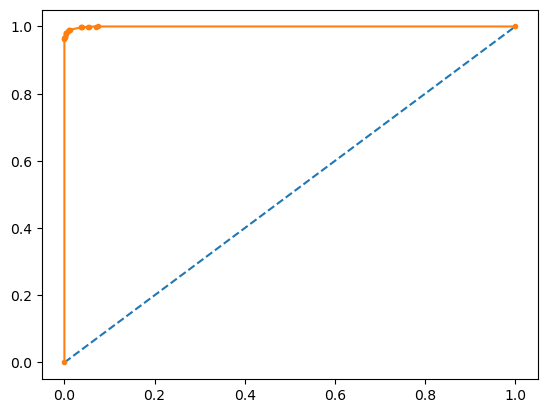

In [460]:
# AUC and ROC for the training data

# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.939


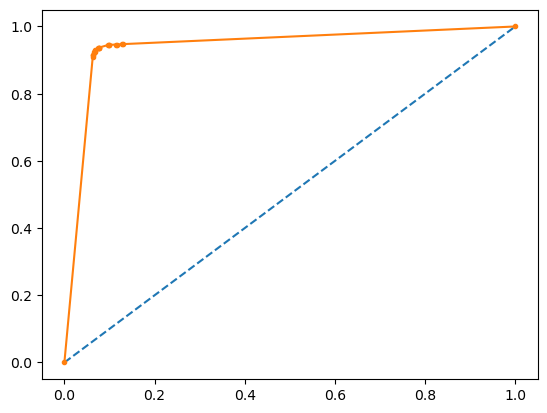

In [462]:
# AUC and ROC for the test data


# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [464]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6549
           1       0.99      0.99      0.99      6560

    accuracy                           0.99     13109
   macro avg       0.99      0.99      0.99     13109
weighted avg       0.99      0.99      0.99     13109



In [466]:
print(classification_report(test_labels, ytest_predict))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2815
           1       0.93      0.93      0.93      2804

    accuracy                           0.93      5619
   macro avg       0.93      0.93      0.93      5619
weighted avg       0.93      0.93      0.93      5619



In [468]:
best_model.score(X_train,train_labels)

0.989396597757266

## RandomTree Classifier

In [471]:
radm_clf = RandomForestClassifier(max_depth = 10, n_estimators=10, random_state=43)
radm_clf.fit(X_train, train_labels)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=43)

In [473]:
print (pd.DataFrame(radm_clf.feature_importances_, columns = ["Imp"], index = X_train.columns))

                              Imp
Tenure                   0.406013
City_tier                0.021360
CC_Contacted_LY          0.047086
Payment_mode             0.025780
Gender                   0.010215
Service_score            0.008246
Account_user_count       0.022574
Account_segment          0.092310
CC_Agent_Score           0.030168
Marital_Status           0.018277
rev_per_month            0.069893
Complain_ly              0.031001
rev_growth_yoy           0.039175
coupon_used_for_payment  0.016037
Day_Since_CC_connect     0.071307
cashback                 0.059312
Login_device             0.031248


In [510]:
ytrain_predict1 = radm_clf.predict(X_train)
ytest_predict1 = radm_clf.predict(X_test)

In [512]:
print(classification_report(train_labels, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6549
           1       0.94      0.94      0.94      6560

    accuracy                           0.94     13109
   macro avg       0.94      0.94      0.94     13109
weighted avg       0.94      0.94      0.94     13109



In [514]:
print(classification_report(test_labels, ytest_predict1))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2815
           1       0.92      0.91      0.92      2804

    accuracy                           0.92      5619
   macro avg       0.92      0.92      0.92      5619
weighted avg       0.92      0.92      0.92      5619



In [481]:
param_spaces = {
        "n_estimators": (50, 500),
        "max_depth": (3, 20),
        "min_samples_split": (2, 20),
        "min_samples_leaf": (1, 20)
}

In [524]:
opt_model = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=43),  # Must use keyword here
    search_spaces=param_spaces,  # `search_spaces` must be named
    n_iter=30,  # Number of iterations
    cv=5,  # Cross-validation folds
    scoring='accuracy',
    random_state=43
)

In [487]:
opt_model.fit(X_train, train_labels)
best_model = opt_model.best_estimator_
print("Best Parameters:", opt_model.best_params_)

Best Parameters: OrderedDict({'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50})


In [489]:
y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probability estimates
fpr, tpr, thresholds = roc_curve(test_labels, y_probs)

In [491]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.5355878615580107


In [493]:
y_pred = (y_probs >= optimal_threshold).astype(int)
final_accuracy = accuracy_score(test_labels, y_pred)
print("Final Model Accuracy:", final_accuracy)

Final Model Accuracy: 0.9720590852464851


In [495]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [497]:
best_model.score(X_train,train_labels)

1.0

AUC: 1.000


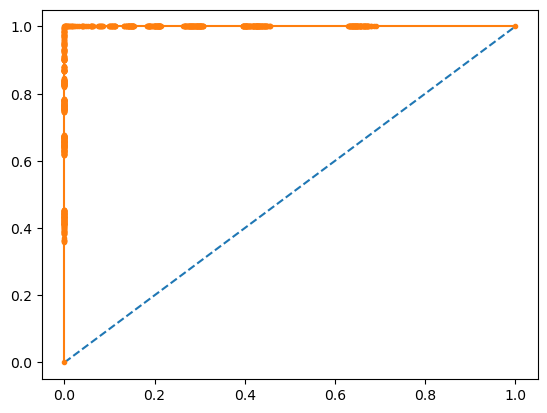

In [499]:
# AUC and ROC for the training data

# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.997


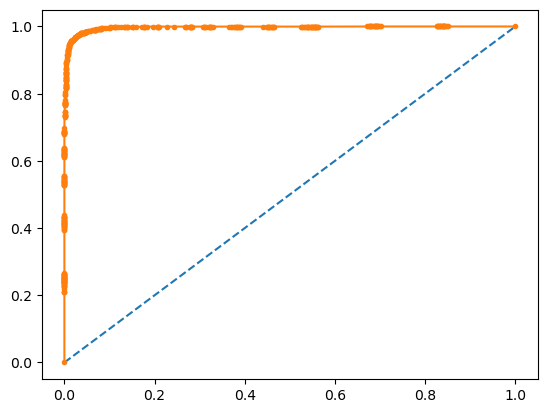

In [501]:
# AUC and ROC for the test data


# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [503]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6549
           1       1.00      1.00      1.00      6560

    accuracy                           1.00     13109
   macro avg       1.00      1.00      1.00     13109
weighted avg       1.00      1.00      1.00     13109



In [505]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2815
           1       0.97      0.97      0.97      2804

    accuracy                           0.97      5619
   macro avg       0.97      0.97      0.97      5619
weighted avg       0.97      0.97      0.97      5619



## AdaBoost Classifier

In [508]:
ada_clf = AdaBoostClassifier(logreg_clf, n_estimators=50, random_state=44)
ada_clf.fit(X_train, train_labels)

C:\Users\Bhamini\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Bhamini\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bhamini\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or 

AdaBoostClassifier(estimator=LogisticRegression(), random_state=44)

In [516]:
ytrain_predict1 = ada_clf.predict(X_train)
ytest_predict1 = ada_clf.predict(X_test)

In [518]:
print(classification_report(train_labels, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      6549
           1       0.72      0.78      0.75      6560

    accuracy                           0.74     13109
   macro avg       0.74      0.74      0.74     13109
weighted avg       0.74      0.74      0.74     13109



In [520]:
print(classification_report(test_labels, ytest_predict1))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      2815
           1       0.72      0.77      0.75      2804

    accuracy                           0.74      5619
   macro avg       0.74      0.74      0.74      5619
weighted avg       0.74      0.74      0.74      5619



In [526]:
params1 = {
        "n_estimators": (50, 500),
        "learning_rate": (0.01, 1.0, "log-uniform")
}

In [528]:
opt_model = BayesSearchCV(
    estimator=AdaBoostClassifier(random_state=44),  # Must use keyword here
    search_spaces=params1,  # `search_spaces` must be named
    n_iter=30,  # Number of iterations
    cv=5,  # Cross-validation folds
    scoring='accuracy',
    random_state=44
)

In [530]:
opt_model.fit(X_train, train_labels)
best_model = opt_model.best_estimator_
print("Best Parameters:", opt_model.best_params_)

C:\Users\Bhamini\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Bhamini\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Bhamini\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Bhamini\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\U

Best Parameters: OrderedDict({'learning_rate': 0.9989704101988238, 'n_estimators': 495})


In [532]:
y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probability estimates
fpr, tpr, thresholds = roc_curve(test_labels, y_probs)

In [534]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.5001562072112752


In [536]:
y_pred = (y_probs >= optimal_threshold).astype(int)
final_accuracy = accuracy_score(test_labels, y_pred)
print("Final Model Accuracy:", final_accuracy)

Final Model Accuracy: 0.9069229400249155


In [538]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [540]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6549
           1       0.91      0.91      0.91      6560

    accuracy                           0.91     13109
   macro avg       0.91      0.91      0.91     13109
weighted avg       0.91      0.91      0.91     13109



In [542]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2815
           1       0.91      0.90      0.90      2804

    accuracy                           0.90      5619
   macro avg       0.90      0.90      0.90      5619
weighted avg       0.90      0.90      0.90      5619



AUC: 0.972


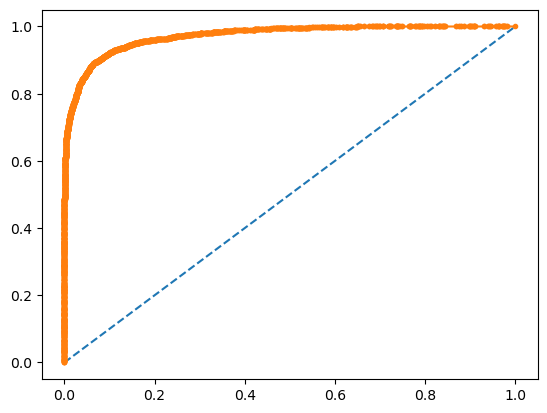

In [544]:
# AUC and ROC for the training data

# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.967


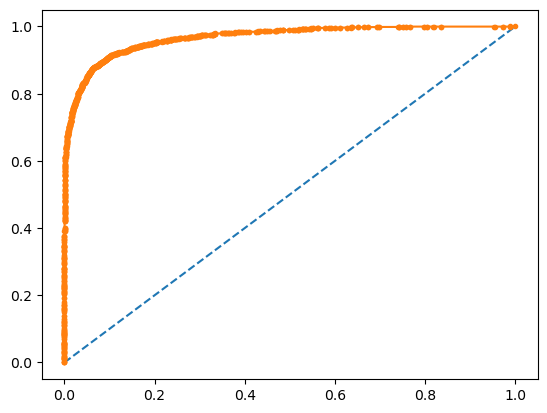

In [546]:
# AUC and ROC for the test data


# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## NaiveBayes

In [549]:
NB_model.fit(X_train, train_labels)

GaussianNB()

In [551]:
ytrain_predict1 = NB_model.predict(X_train)
ytest_predict1 = NB_model.predict(X_test)

In [553]:
print(classification_report(train_labels, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      6549
           1       0.72      0.77      0.75      6560

    accuracy                           0.74     13109
   macro avg       0.74      0.74      0.74     13109
weighted avg       0.74      0.74      0.74     13109



In [555]:
print(classification_report(test_labels, ytest_predict1))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      2815
           1       0.71      0.77      0.74      2804

    accuracy                           0.73      5619
   macro avg       0.73      0.73      0.73      5619
weighted avg       0.73      0.73      0.73      5619



In [557]:
params2 = {
        "var_smoothing": (1e-9, 1e-3, "log-uniform")
}

In [559]:
opt_model = BayesSearchCV(
    estimator=GaussianNB(),  # Must use keyword here
    search_spaces=params2,  # `search_spaces` must be named
    n_iter=30,  # Number of iterations
    cv=5,  # Cross-validation folds
    scoring='accuracy',
)

In [561]:
opt_model.fit(X_train, train_labels)
best_model = opt_model.best_estimator_
print("Best Parameters:", opt_model.best_params_)

C:\Users\Bhamini\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [2.928501854768237e-09] before, using random point [8.809374454051897e-09]
  warnings.warn(
C:\Users\Bhamini\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [2.8944134246408415e-09] before, using random point [0.0008339047717146914]
  warnings.warn(
C:\Users\Bhamini\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [2.931914217337528e-09] before, using random point [5.385845698432985e-09]
  warnings.warn(
C:\Users\Bhamini\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [2.8317098160515807e-09] before, using random point [1.231852306092789e-06]
  warnings.warn(
C:\Users\Bhamini\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: Th

Best Parameters: OrderedDict({'var_smoothing': 0.001})


In [563]:
y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probability estimates
fpr, tpr, thresholds = roc_curve(test_labels, y_probs)

In [565]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.5318892224897713


In [567]:
y_pred = (y_probs >= optimal_threshold).astype(int)
final_accuracy = accuracy_score(test_labels, y_pred)
print("Final Model Accuracy:", final_accuracy)

Final Model Accuracy: 0.7490656700480512


In [569]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [571]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.69      0.72      6549
           1       0.72      0.79      0.75      6560

    accuracy                           0.74     13109
   macro avg       0.74      0.74      0.74     13109
weighted avg       0.74      0.74      0.74     13109



In [573]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      2815
           1       0.71      0.79      0.75      2804

    accuracy                           0.73      5619
   macro avg       0.74      0.73      0.73      5619
weighted avg       0.74      0.73      0.73      5619



AUC: 0.800


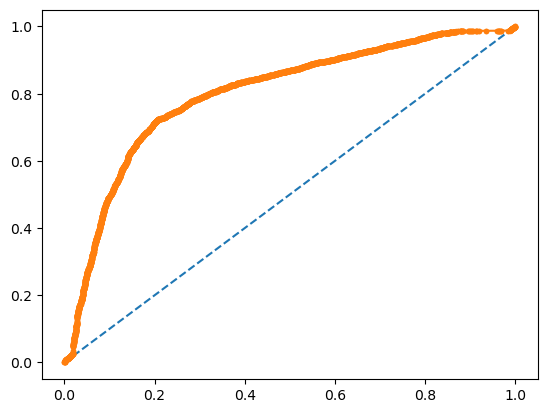

In [575]:
# AUC and ROC for the training data

# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.793


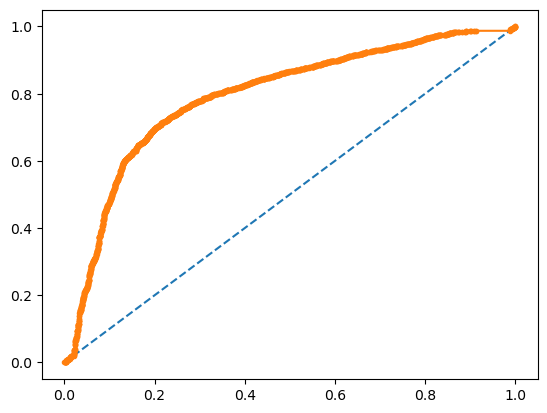

In [577]:
# AUC and ROC for the test data


# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [579]:
best_model.score(X_train,train_labels)

0.7398733694408421

## XGBoost Classifier

In [582]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', objective='binary:logistic')
xgb_model.fit(X_train, train_labels)

C:\Users\Bhamini\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:49:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [584]:
ytrain_predict1 = xgb_model.predict(X_train)
ytest_predict1 = xgb_model.predict(X_test)

In [586]:
print(classification_report(train_labels, ytrain_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6549
           1       1.00      1.00      1.00      6560

    accuracy                           1.00     13109
   macro avg       1.00      1.00      1.00     13109
weighted avg       1.00      1.00      1.00     13109



In [588]:
print(classification_report(test_labels, ytest_predict1))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2815
           1       0.97      0.98      0.98      2804

    accuracy                           0.98      5619
   macro avg       0.98      0.98      0.98      5619
weighted avg       0.98      0.98      0.98      5619



In [627]:
print (pd.DataFrame(xgb_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                              Imp
Tenure                   0.249749
City_tier                0.059763
CC_Contacted_LY          0.028969
Payment_mode             0.039196
Gender                   0.026504
Service_score            0.022334
Account_user_count       0.034174
Account_segment          0.084710
CC_Agent_Score           0.040549
Marital_Status           0.035675
rev_per_month            0.087623
Complain_ly              0.070017
rev_growth_yoy           0.046147
coupon_used_for_payment  0.024792
Day_Since_CC_connect     0.042615
cashback                 0.025313
Login_device             0.081870


In [592]:
params3 = {
        "n_estimators": (50, 500),
        "max_depth": (3, 20),
        "learning_rate": (0.01, 1.0, 'log-uniform'),
        "subsample": (0.5, 1.0)
}

In [594]:
opt_model = BayesSearchCV(
        estimator=XGBClassifier(),
        search_spaces=params3,
        n_iter=30,  # Number of iterations
        cv=5,  # Cross-validation folds
        scoring='accuracy',
        n_jobs=-1  # Use all CPU cores
)

In [596]:
opt_model.fit(X_train, train_labels)
best_model = opt_model.best_estimator_
print("Best Parameters:", opt_model.best_params_)

Best Parameters: OrderedDict({'learning_rate': 0.2930758563335125, 'max_depth': 7, 'n_estimators': 500, 'subsample': 1.0})


In [598]:
y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probability estimates
fpr, tpr, thresholds = roc_curve(test_labels, y_probs)

In [600]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.58046997


In [602]:
y_pred = (y_probs >= optimal_threshold).astype(int)
final_accuracy = accuracy_score(test_labels, y_pred)
print("Final Model Accuracy:", final_accuracy)

Final Model Accuracy: 0.983804947499555


In [604]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [606]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6549
           1       1.00      1.00      1.00      6560

    accuracy                           1.00     13109
   macro avg       1.00      1.00      1.00     13109
weighted avg       1.00      1.00      1.00     13109



In [608]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2815
           1       0.98      0.98      0.98      2804

    accuracy                           0.98      5619
   macro avg       0.98      0.98      0.98      5619
weighted avg       0.98      0.98      0.98      5619



AUC: 1.000


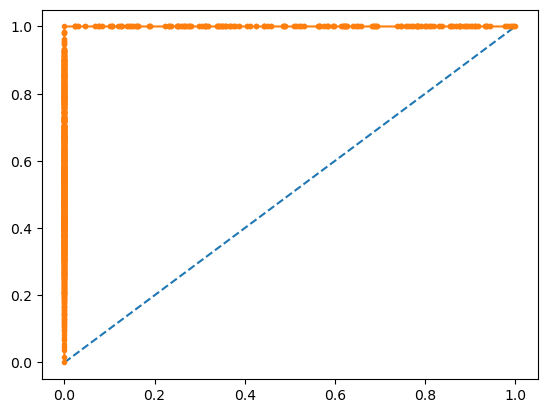

In [610]:
# AUC and ROC for the training data

# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.999


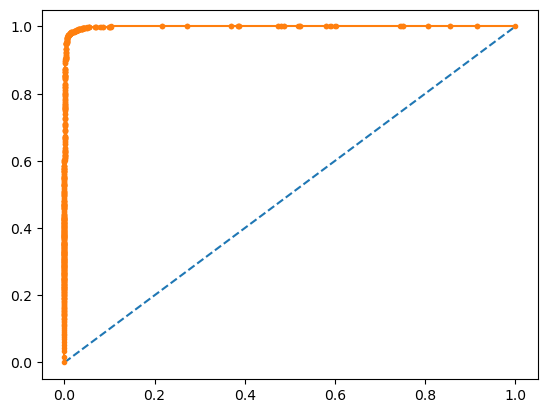

In [612]:
# AUC and ROC for the test data


# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Support Vector Machine Model

In [615]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [617]:
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, train_labels)

SVC(probability=True)

In [619]:
ytrain_predict1 = svm_model.predict(X_train_scaled)
ytest_predict1 = svm_model.predict(X_test_scaled)

In [621]:
print(classification_report(train_labels, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      6549
           1       0.91      0.95      0.93      6560

    accuracy                           0.93     13109
   macro avg       0.93      0.93      0.93     13109
weighted avg       0.93      0.93      0.93     13109



In [623]:
print(classification_report(test_labels, ytest_predict1))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2815
           1       0.90      0.94      0.92      2804

    accuracy                           0.91      5619
   macro avg       0.91      0.91      0.91      5619
weighted avg       0.91      0.91      0.91      5619



AUC: 0.976


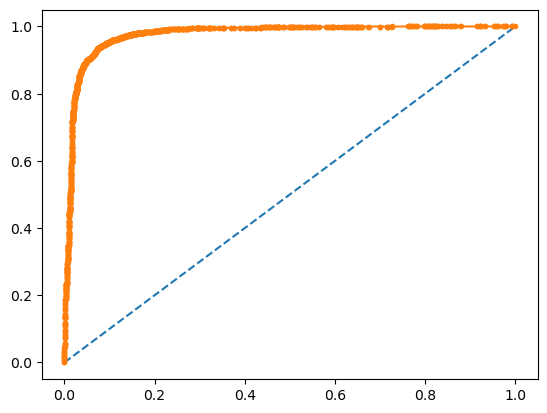

In [631]:
# AUC and ROC for the training data

# predict probabilities
probs = svm_model.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.969


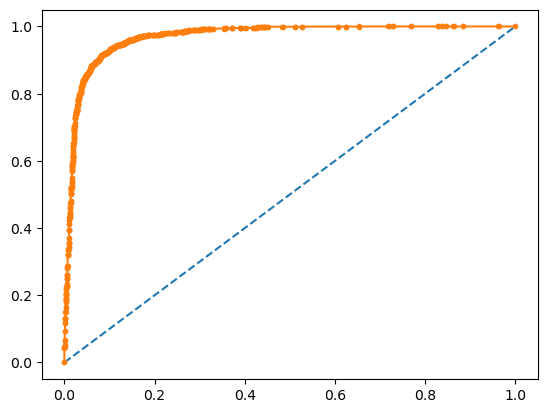

In [633]:
# AUC and ROC for the test data


# predict probabilities
probs = svm_model.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [635]:
param_space = {
    'C': (0.1, 100, 'log-uniform'),  # Regularization parameter
    'gamma': (0.001, 10, 'log-uniform'),  # Kernel coefficient (for RBF kernel)
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
}

In [641]:
opt_model = BayesSearchCV(
        estimator=SVC(),
        search_spaces=param_space,
        n_iter=30,  # Number of iterations
        cv=5,  # Cross-validation folds
        scoring='accuracy',
        n_jobs=-1  # Use all CPU cores
)
